## Exploratory data analysis (EDA) with the provided data

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8"))

import warnings
warnings.filterwarnings('ignore')


%config Completer.use_jedi = False
%load_ext watermark
%watermark --iversions

110m_cultural
110m_cultural.zip
COVID-19DATA_DZIFA_7_2_24.xlsx
DZIFAS_DATA.ipynb
Springer_Nature_bankruptcy.pdf
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
WAMCAD_lecture01_.pdf
WAMCAD_lecture02._.pdf
mdata.xlsx
ne_110m_admin_0_countries
ne_110m_admin_0_countries.zip
synthetic_data.csv
synthetic_data_updated.csv
untitled folder
vis_mis_plot.png

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
seaborn   : 0.11.1
matplotlib: 3.5.2
numpy     : 1.21.5
pandas    : 1.4.3



In [19]:
pwd

'/Users/admin/Desktop/Data Analytics/slide_preparation/WAMCAD/Lec'

1. **Load the DataFrame:**

In [20]:
fname = "/Users/admin/Desktop/Data Analytics/slide_preparation/WAMCAD/Lec/"
xl = pd.ExcelFile(fname + 'COVID-19DATA_DZIFA_7_2_24.xlsx')
xl.sheet_names

['Sheet1']

In [21]:
df_ = xl.parse(sheet_name='Sheet1')
df_.head()

,Name,MSP1.19KwConc,RowConc,Averageconc,malaria_exposure,Age,Gender,Symptom,Symptom1,Ageclasses1,genotpe,Sex
0,122064290,14421.0,51897.0,33159,high,68,Female,Mild,Mild,>60,T allele,Female
1,PT-22-025,4769.0,5353.0,5061,medium,55,Female,Mild,Mild,51-60,T allele,Female
2,122071138,14056.0,26696.0,20376,medium,30,Female,Mild,Mild,18-30,T allele,Female
3,122063362,3750.0,7684.0,5717,medium,40,Female,Mild,Mild,31-40,T allele,Female
4,122081501,3160.0,2996.0,3078,low,29,Female,Mild,Mild,18-30,T allele,Female


In [22]:
df_.columns

Index(['Name', 'MSP1.19KwConc', 'RowConc', 'Averageconc', 'malaria_exposure',
       'Age', 'Gender', 'Symptom', 'Symptom1', 'Ageclasses1', 'genotpe',
       'Sex'],
      dtype='object')

* Drop unwanted colimns

In [23]:
#drop 'ID' column
df_.drop(['Name','Symptom1'], axis=1, inplace=True)

df_.head(n=10)

,MSP1.19KwConc,RowConc,Averageconc,malaria_exposure,Age,Gender,Symptom,Ageclasses1,genotpe,Sex
0,14421.0,51897.0,33159,high,68,Female,Mild,>60,T allele,Female
1,4769.0,5353.0,5061,medium,55,Female,Mild,51-60,T allele,Female
2,14056.0,26696.0,20376,medium,30,Female,Mild,18-30,T allele,Female
3,3750.0,7684.0,5717,medium,40,Female,Mild,31-40,T allele,Female
4,3160.0,2996.0,3078,low,29,Female,Mild,18-30,T allele,Female
5,11374.0,113663.0,62518,high,79,Female,Mild,>60,T allele,Female
6,21953.0,198764.0,110358,high,14,Female,Mild,18-30,T allele,Female
7,6092.0,4985.0,5538,medium,54,Female,Mild,51-60,CT allele,Female
8,7764.0,6094.0,6929,medium,29,Female,Mild,18-30,T allele,Female
9,6177.0,5655.0,5916,medium,26,Female,Mild,18-30,T allele,Female


* Visualizing Missing Data using Seaborn displot()

In [24]:
def checkMisDataFrame(df, savfig=True):
    plt.figure(figsize=(10,6), dpi=100)
    sns.displot(
                data=df.isna().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                aspect=1.25
                )
    plt.savefig("vis_mis_plot.png", dpi=200)

<Figure size 1000x600 with 0 Axes>

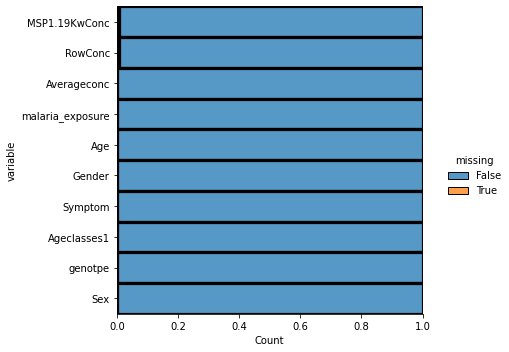

In [25]:
checkMisDataFrame(df=df_, savfig=True)

In [26]:
df_.isnull().sum()

MSP1.19KwConc       1
RowConc             1
Averageconc         0
malaria_exposure    0
Age                 0
Gender              0
Symptom             0
Ageclasses1         0
genotpe             0
Sex                 0
dtype: int64

In [27]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSP1.19KwConc     127 non-null    float64
 1   RowConc           127 non-null    float64
 2   Averageconc       128 non-null    int64  
 3   malaria_exposure  128 non-null    object 
 4   Age               128 non-null    int64  
 5   Gender            128 non-null    object 
 6   Symptom           128 non-null    object 
 7   Ageclasses1       128 non-null    object 
 8   genotpe           128 non-null    object 
 9   Sex               128 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 10.1+ KB


In [28]:
# Get the locations of missing values using numpy's np.where()

In [29]:
miss_values = df_.isnull()
locs = np.where(miss_values)
locs

(array([44, 49]), array([0, 1]))

In [30]:
# Create a DataFrame with the locations
mis_loc_df = pd.DataFrame({'Row': locs[0], 'Column': locs[1]})
mis_loc_df

,Row,Column
0,44,0
1,49,1


In [31]:
df_.iloc[44,0], df_.iloc[49,1]

(nan, nan)

In [32]:
# Fill missing values for numeric columns with mean
numeric_columns = df_.select_dtypes(include=np.number).columns
df_[numeric_columns] = df_[numeric_columns].fillna(df_[numeric_columns].mean())
df_.isnull().sum()

MSP1.19KwConc       0
RowConc             0
Averageconc         0
malaria_exposure    0
Age                 0
Gender              0
Symptom             0
Ageclasses1         0
genotpe             0
Sex                 0
dtype: int64

In [33]:
# Fill missing values for categorical columns with mode
categorical_columns = df_.select_dtypes(include='object').columns
df_[categorical_columns] = df_[categorical_columns].fillna(df_[categorical_columns].mode().iloc[0])


3. **Summary Statistics:** 
    
       Get summary statistics for numerical columns.    

In [35]:
summary_stats = df_.describe()
print(summary_stats)

       MSP1.19KwConc        RowConc    Averageconc         Age
count     128.000000     128.000000     128.000000  128.000000
mean    16625.062992   27412.267717   21919.554688   40.054688
std     53287.316970   79894.976181   51046.658012   17.039698
min        31.000000     229.000000     244.000000   12.000000
25%      4704.500000    3498.250000    4889.750000   28.000000
50%      8300.000000    7728.500000    9279.000000   35.000000
75%     16258.250000   21421.000000   19605.000000   51.000000
max    596821.000000  665533.000000  340424.000000   83.000000


In [36]:
dictionary_data = df_.to_dict()
dictionary_data

{'MSP1.19KwConc': {0: 14421.0,
  1: 4769.0,
  2: 14056.0,
  3: 3750.0,
  4: 3160.0,
  5: 11374.0,
  6: 21953.0,
  7: 6092.0,
  8: 7764.0,
  9: 6177.0,
  10: 19323.0,
  11: 8290.0,
  12: 2966.0,
  13: 11008.0,
  14: 27351.0,
  15: 25502.0,
  16: 980.0,
  17: 15437.0,
  18: 1802.0,
  19: 6670.0,
  20: 10545.0,
  21: 11838.0,
  22: 17214.0,
  23: 5813.0,
  24: 7022.0,
  25: 16802.0,
  26: 5046.0,
  27: 17767.0,
  28: 26074.0,
  29: 30397.0,
  30: 5988.0,
  31: 30510.0,
  32: 5023.0,
  33: 2342.0,
  34: 8310.0,
  35: 32666.0,
  36: 10108.0,
  37: 16221.0,
  38: 7792.0,
  39: 2967.0,
  40: 38501.0,
  41: 23413.0,
  42: 8366.0,
  43: 2668.0,
  44: 16625.062992125986,
  45: 5641.0,
  46: 4063.0,
  47: 6325.0,
  48: 13855.0,
  49: 18429.0,
  50: 14801.0,
  51: 23375.0,
  52: 17762.0,
  53: 6459.0,
  54: 4830.0,
  55: 39570.0,
  56: 23757.0,
  57: 9987.0,
  58: 1990.0,
  59: 16765.0,
  60: 10518.0,
  61: 112152.0,
  62: 19287.0,
  63: 1915.0,
  64: 31.0,
  65: 2620.0,
  66: 596821.0,
  67: 1973

4. **Distribution Plots:**
Plot histograms for numerical columns to understand their distributions.

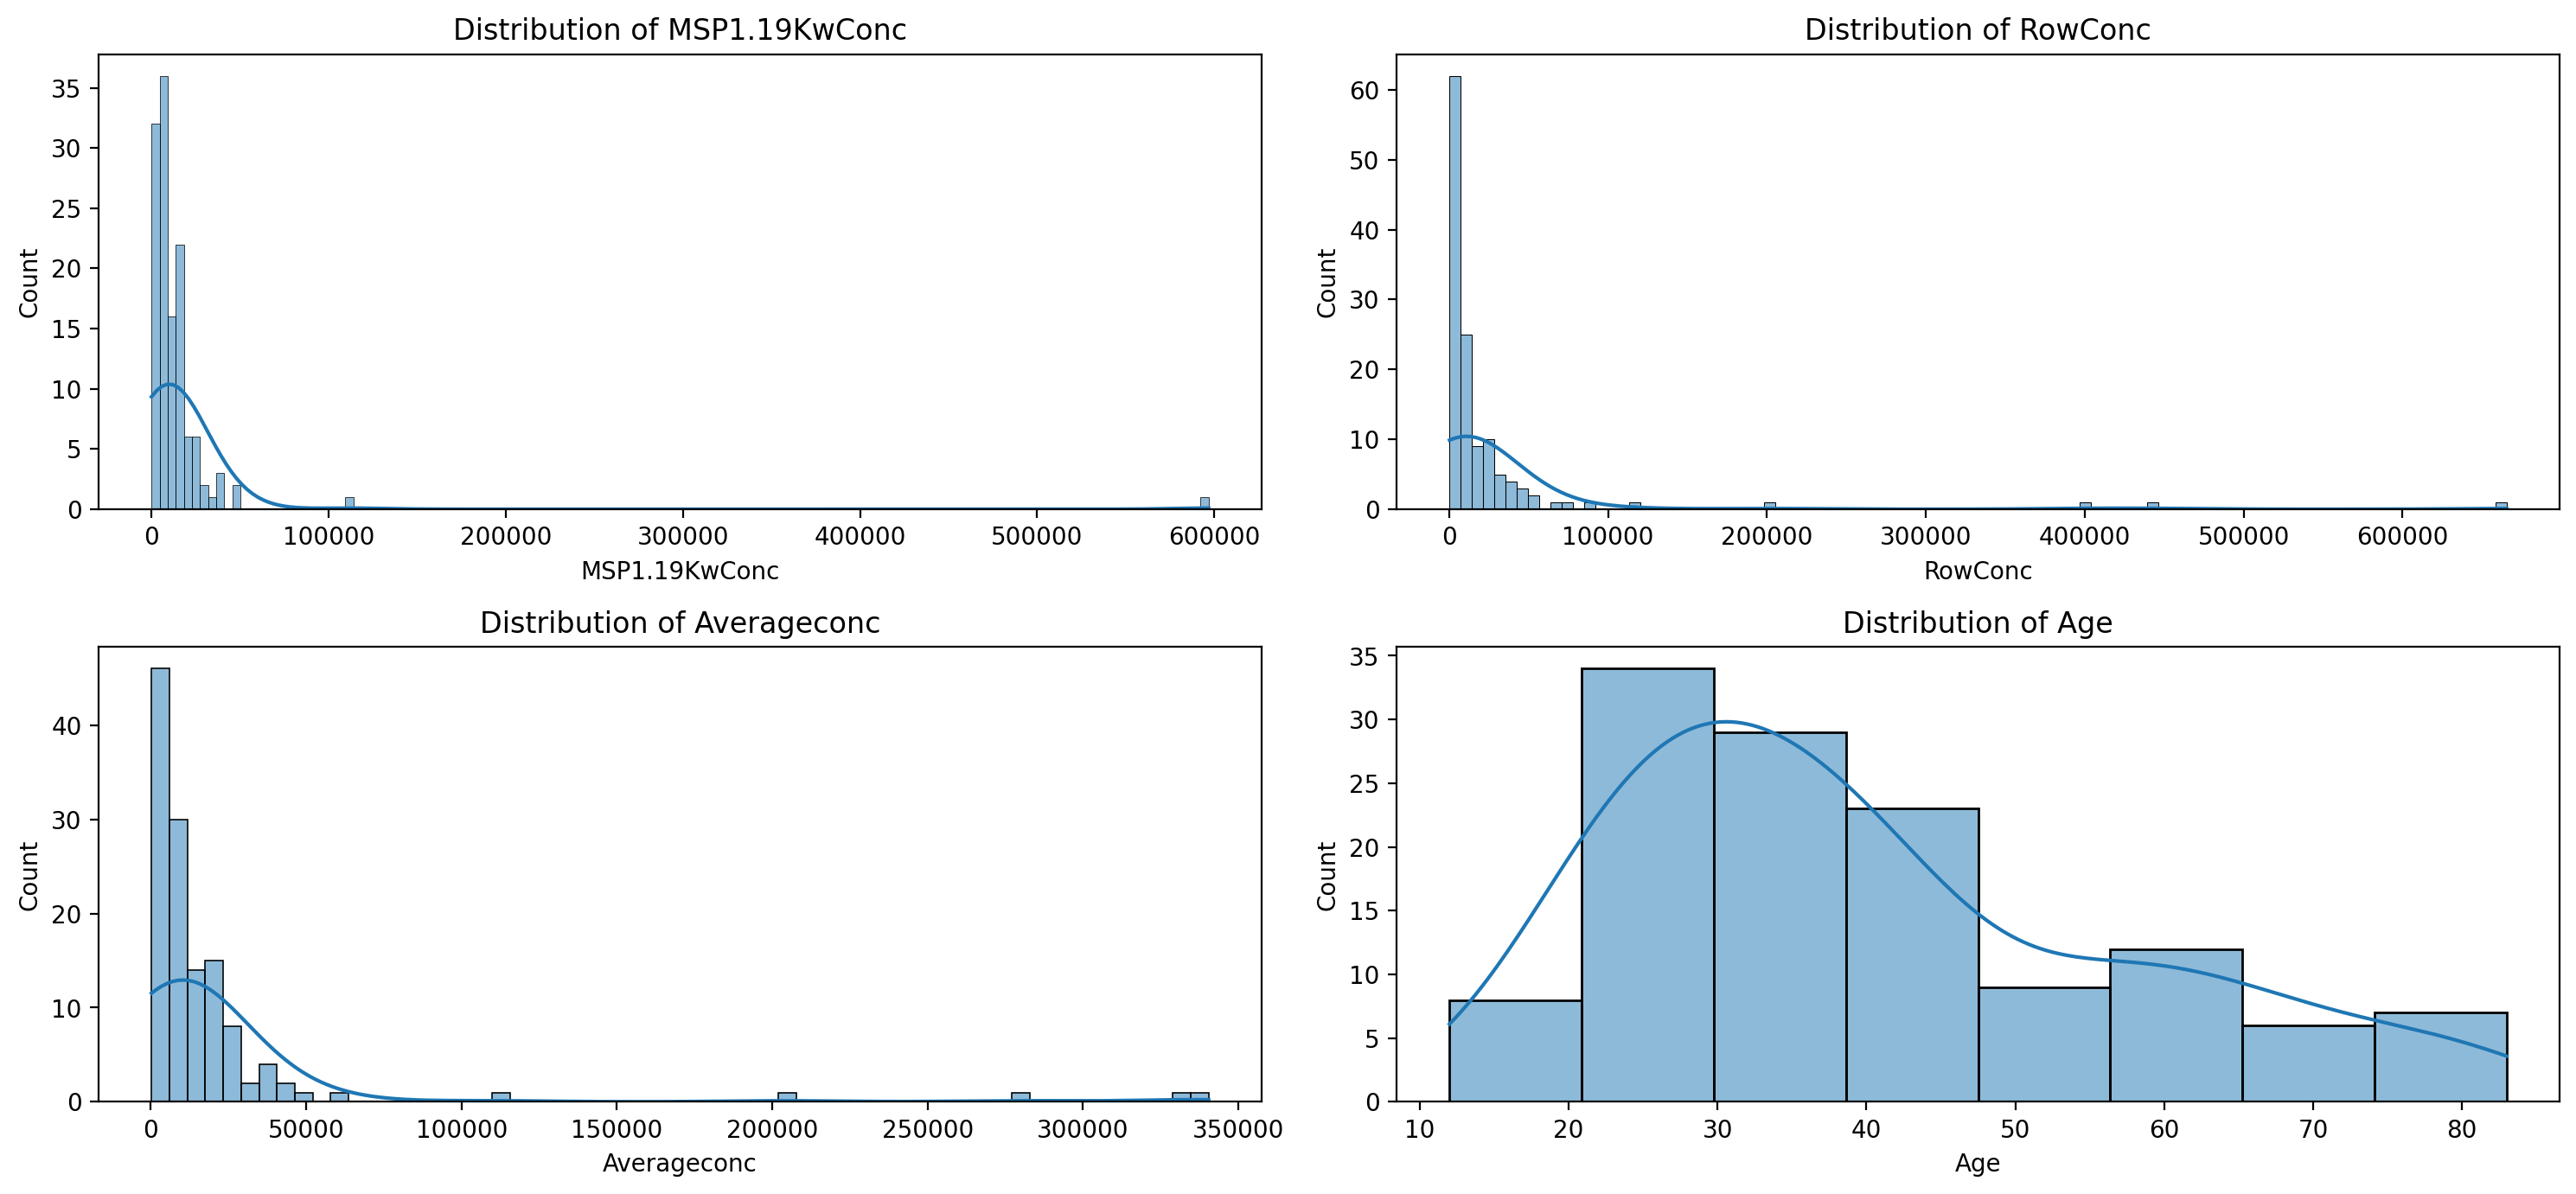

In [37]:
plt.figure(figsize=(15, 10), dpi=200)
for i, col in enumerate(df_.select_dtypes(include='number').columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df_[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()  

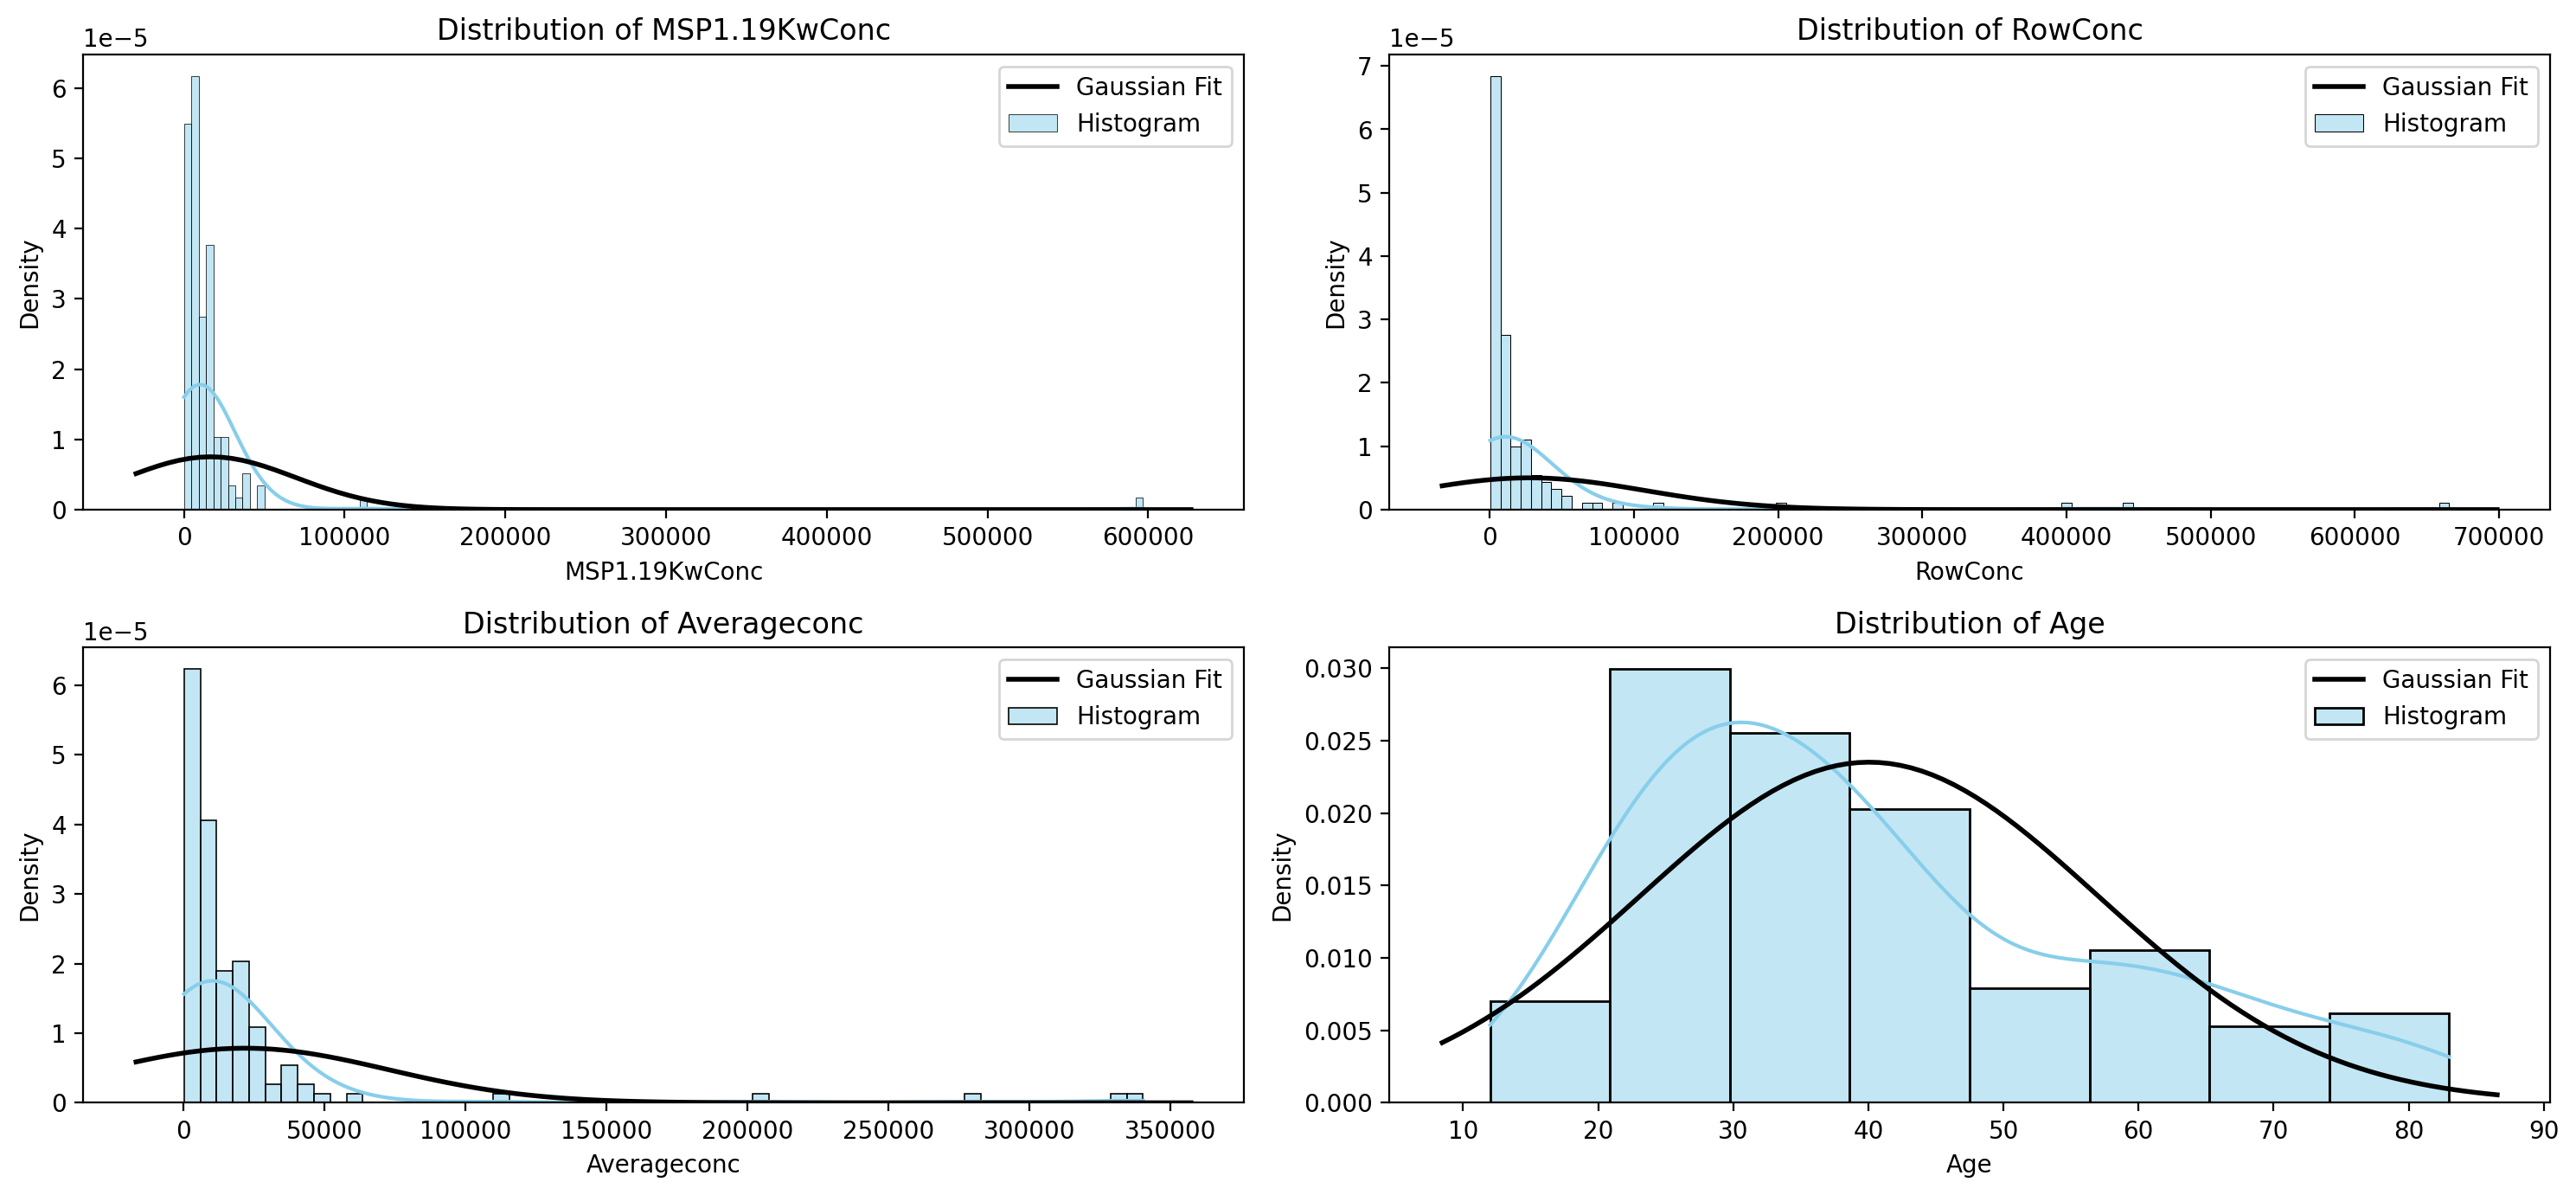

In [38]:
from scipy.stats import norm

plt.figure(figsize=(15, 10), dpi=200)

for i, col in enumerate(df_.select_dtypes(include='number').columns):
    plt.subplot(3, 2, i + 1)
    
    # Plot histogram with Gaussian distribution fit
    sns.histplot(df_[col], kde=True, color='skyblue', stat='density', label='Histogram')
    
    # Fit a Gaussian distribution to the data
    mu, std = norm.fit(df_[col])
    
    # Plot the fitted Gaussian distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

    plt.title(f'Distribution of {col}')
    plt.legend()

plt.tight_layout()
plt.show()

In [39]:
#!/usr/bin/env python3
'''
T. A-N authored this Python script
'''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot
# from sklearn.preprocessing import QuantileTransformer


class NormalityChecker:
    def __init__(self, df):
        self.df = df

    def _plot_distribution(self, ax, data, title):        

        sns.distplot(data,
                     fit=norm,
                     hist_kws=dict(edgecolor="black",
                                   linewidth=2,
                                   color='blue'),
                     kde_kws={'linestyle': '--',
                              'linewidth': 2,
                              "color": "darkgreen",
                              "label": "KDE"},
                     ax=ax)
        ax.grid(True, linestyle='--')

        (mu, sigma) = norm.fit(data)
        ax.legend(['Normal dist. ($\mu=$ {:.2f}; $\sigma=$ {:.2f})'.format(mu, sigma)],
                  loc='best')
        ax.set_title(title)

    def _qq_plot(self, ax, data):        

        probplot(data, plot=ax, rvalue=True)
        ax.grid(True, linestyle='--')

    def check_normality(self, cname):
        fig, ((ax1, ax2)) = plt.subplots(1, 2,
                                        figsize=(12, 6),
                                        dpi=80)

        self._plot_distribution(ax1, self.df[cname], '{} distribution'.format(cname))
        self._qq_plot(ax2, self.df[cname])        

        fig.tight_layout()


class LogTransformChecker:
    def __init__(self, df):
        self.df = df

    def _plot_distribution(self, ax, data, title, log_transform=False):
        if log_transform:
            data = np.log1p(data)

        sns.distplot(data,
                     fit=norm,
                     hist_kws=dict(edgecolor="black",
                                   linewidth=2,
                                   color='blue'),
                     kde_kws={'linestyle': '--',
                              'linewidth': 2,
                              "color": "darkgreen",
                              "label": "KDE"},
                     ax=ax)
        ax.grid(True, linestyle='--')

        (mu, sigma) = norm.fit(data)
        ax.legend(['Normal dist. ($\mu=$ {:.2f}; $\sigma=$ {:.2f})'.format(mu, sigma)],
                  loc='best')
        ax.set_title(title)

    def _qq_plot(self, ax, data, log_transform=False):
        if log_transform:
            data = np.log1p(data)

        probplot(data, plot=ax, rvalue=True)
        ax.grid(True, linestyle='--')

    def check_normality(self, cname, return_log_transform=True):
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,
                                                    figsize=(12, 12),
                                                    dpi=80)

        self._plot_distribution(ax1, self.df[cname], '{} distribution'.format(cname))
        self._qq_plot(ax2, self.df[cname])

        if return_log_transform:
            self.df[cname] = np.log1p(self.df[cname])
            self._plot_distribution(ax3, self.df[cname], '{} distribution in log scale'.format(cname), log_transform=True)
            self._qq_plot(ax4, self.df[cname], log_transform=True)

        fig.tight_layout()

        if return_log_transform:
            return self.df[cname]

# Example usage:
# normality_checker = LogTransformChecker(your_dataframe)
# transformed_column = normality_checker.check_normality('your_column_name')

In [40]:
numeric_columns[1]

'RowConc'

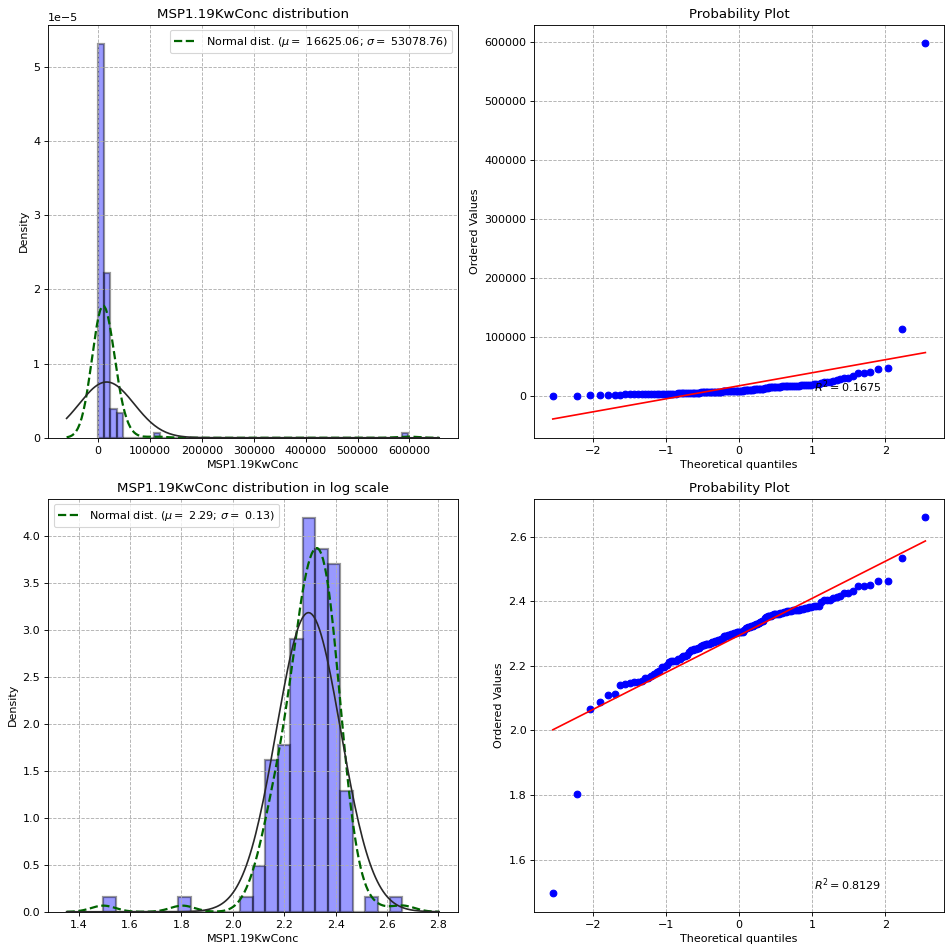

In [41]:
normality_checker = LogTransformChecker(df_[numeric_columns])

transformed_column = normality_checker.check_normality('MSP1.19KwConc')


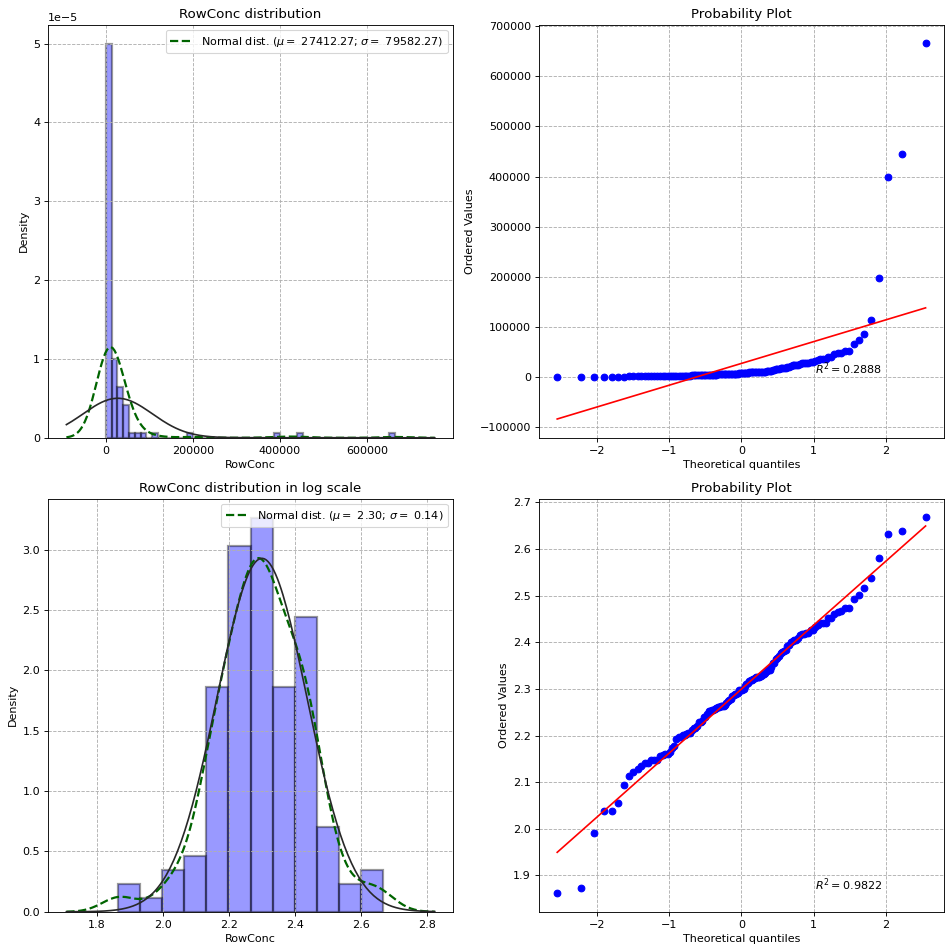

In [42]:
transformed_column = normality_checker.check_normality(numeric_columns[1])

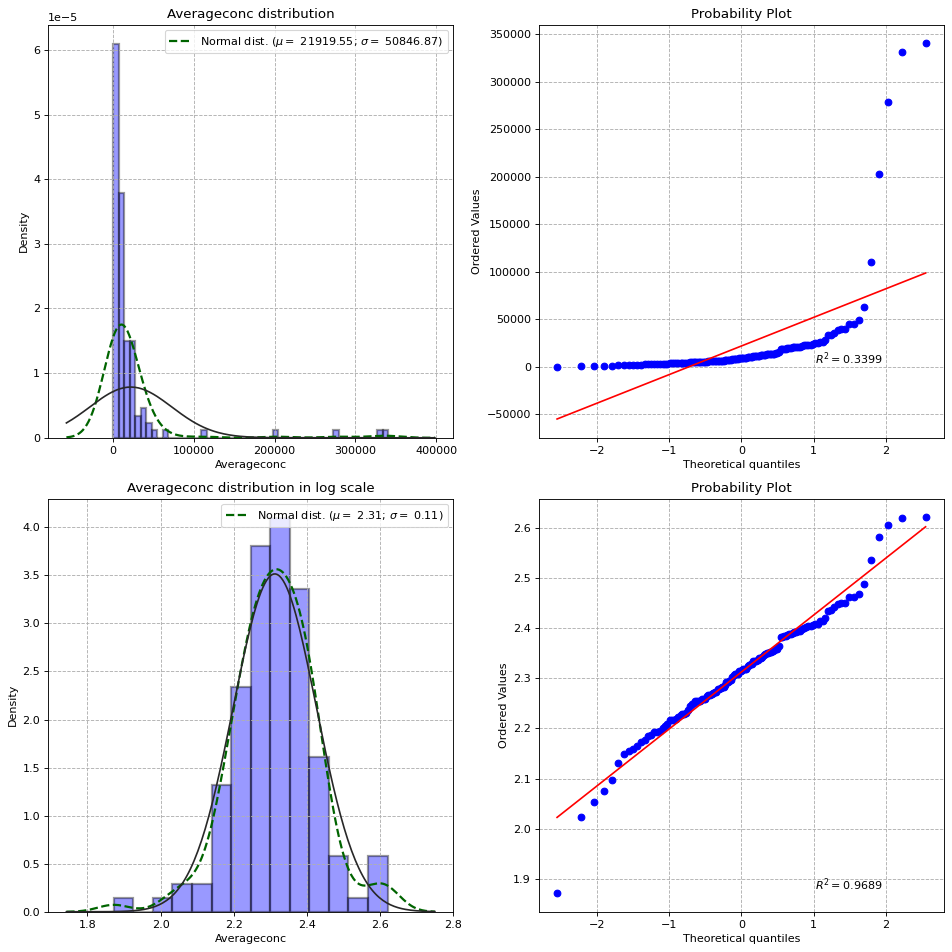

In [43]:
transformed_column = normality_checker.check_normality(numeric_columns[2])

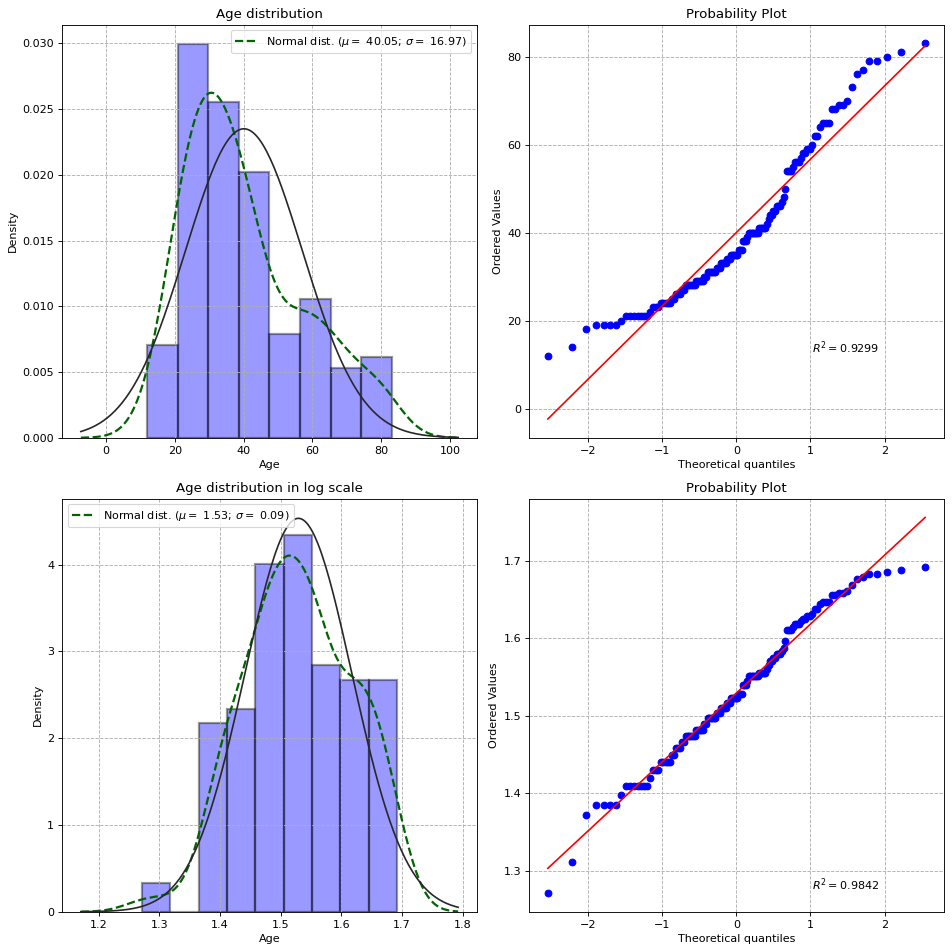

In [44]:
transformed_column = normality_checker.check_normality(numeric_columns[3])

**Box Plots:**

Visualize the spread and central tendency of numerical variables using box plots.

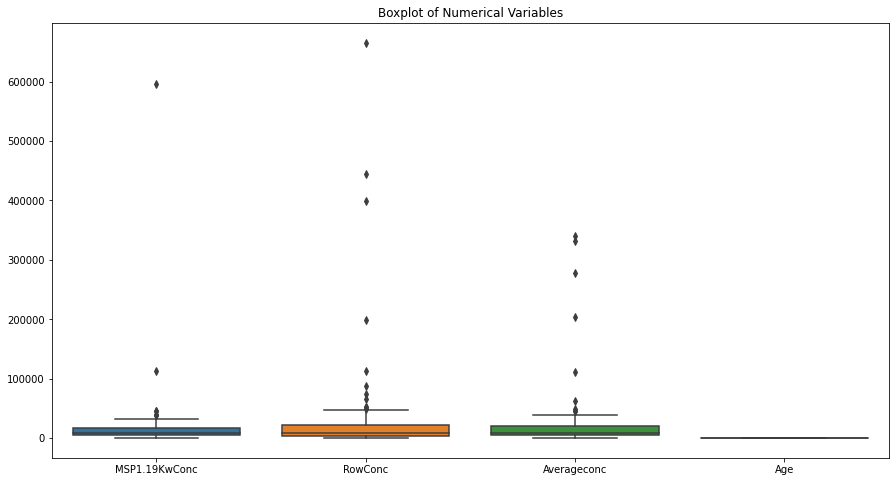

In [45]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_.select_dtypes(include='number'))
plt.title('Boxplot of Numerical Variables')
plt.show()


,MSP1.19KwConc,RowConc,Averageconc,Age
0,2.358636,2.472921,2.434411,1.655196
1,2.248140,2.260262,2.254394,1.614495
2,2.356209,2.415227,2.390794,1.489299
3,2.222435,2.297274,2.267100,1.550446
4,2.203719,2.197821,2.200814,1.481877
5,2.335940,2.536946,2.488502,1.683065
6,2.397596,2.580208,2.534609,1.310506
7,2.273660,2.252805,2.263799,1.610903
8,2.298314,2.273694,2.286823,1.481877
9,2.275085,2.265970,2.270639,1.457646


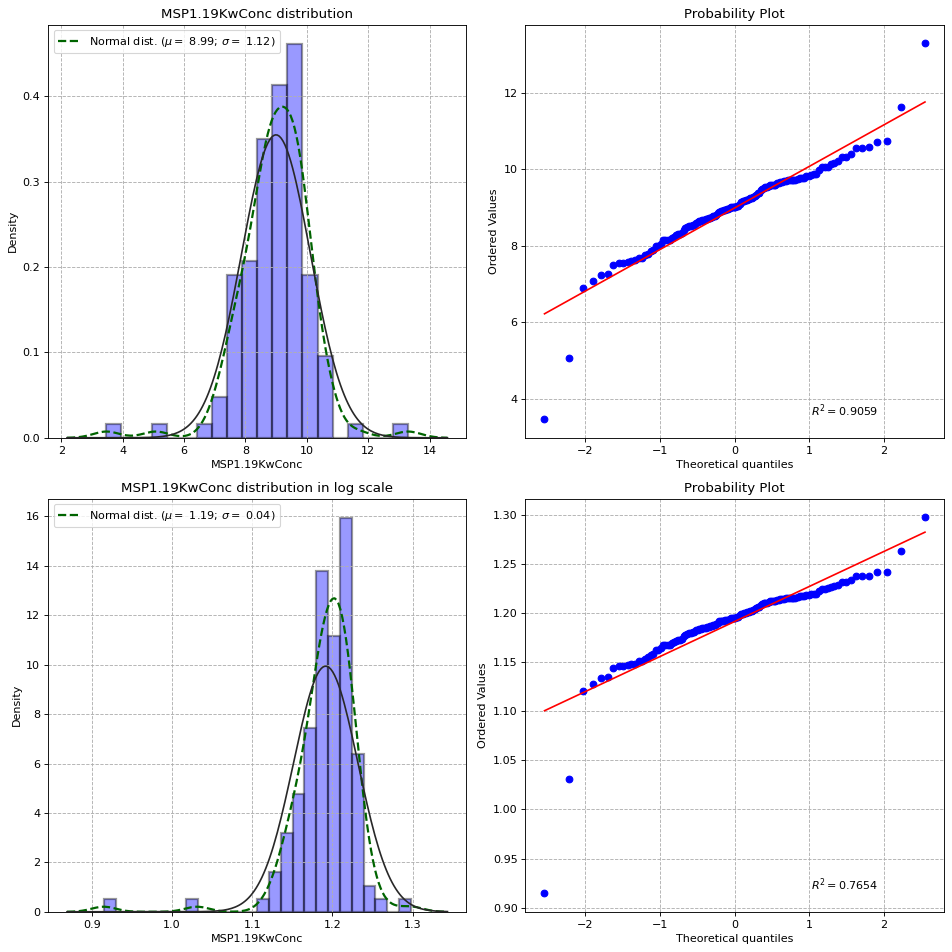

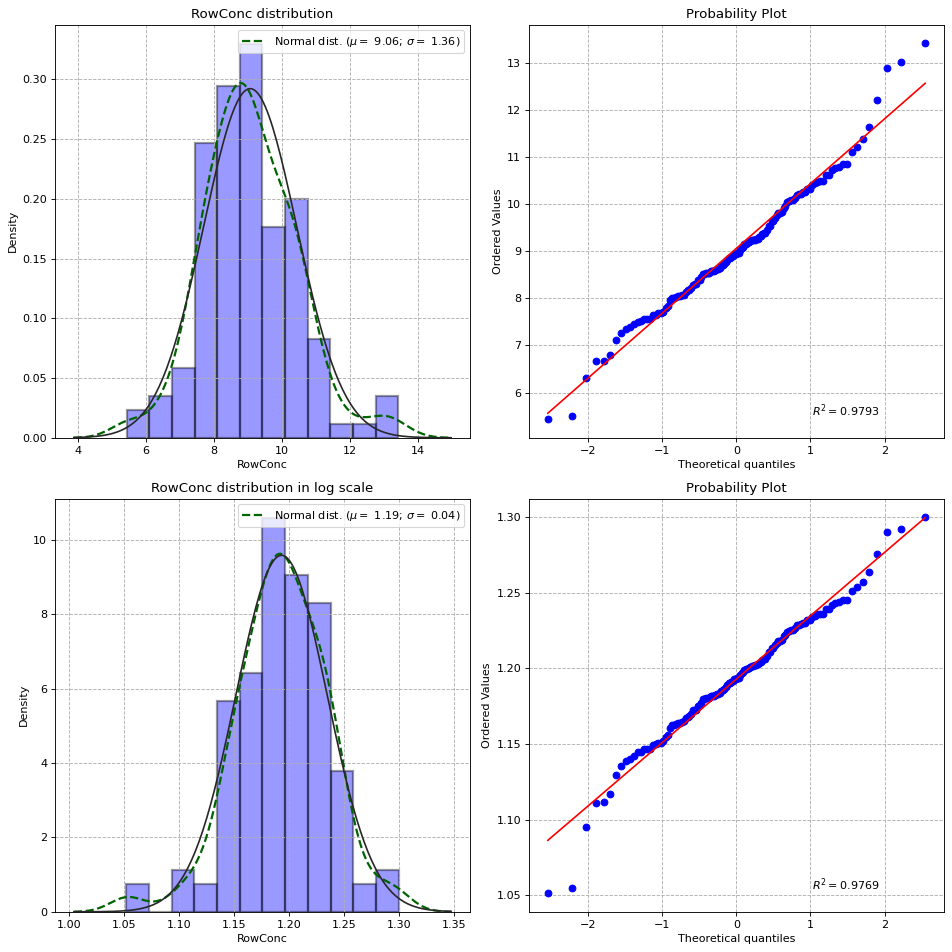

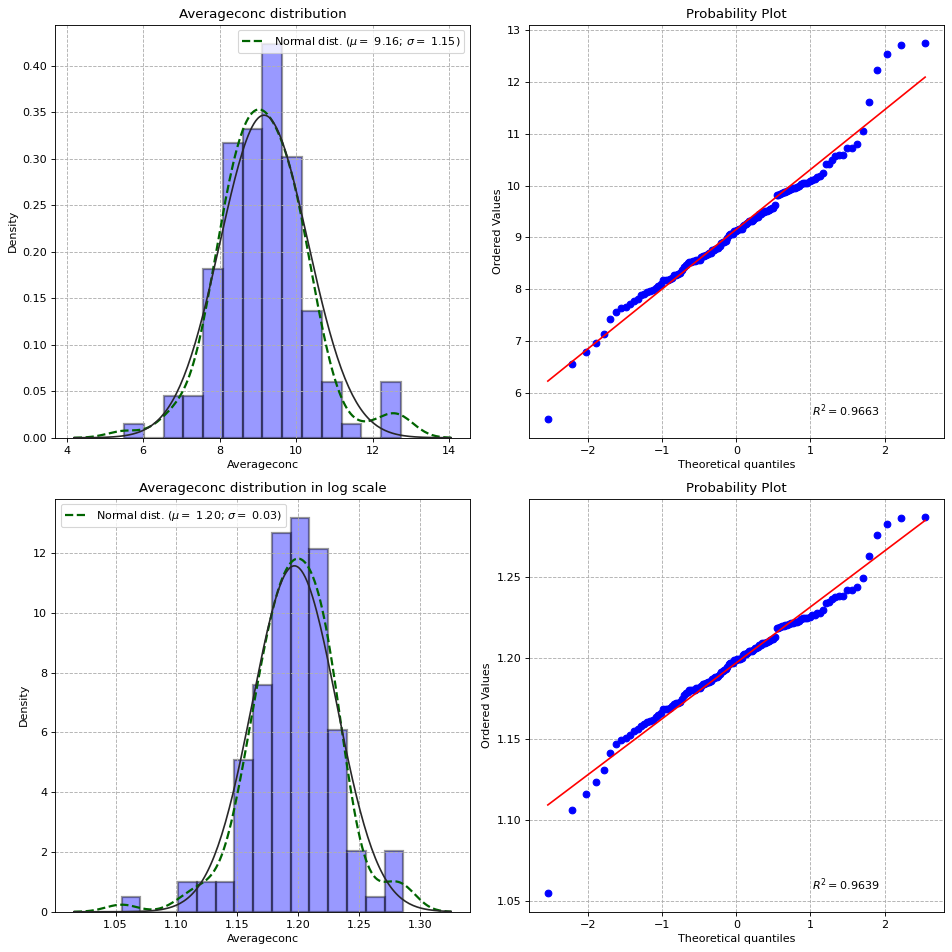

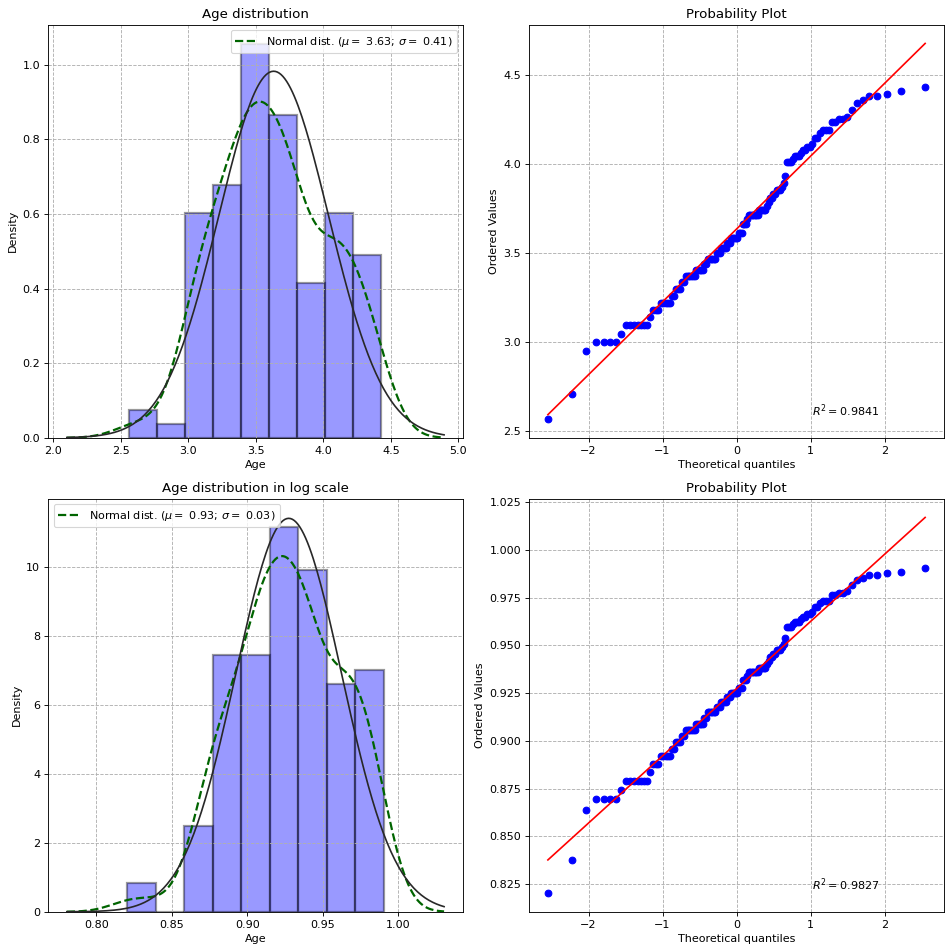

In [46]:
dflog = pd.DataFrame()

for i, col in enumerate(df_.select_dtypes(include='number').columns):
    
    dflog[col] = normality_checker.check_normality(numeric_columns[i])
    
dflog.head(n=10)

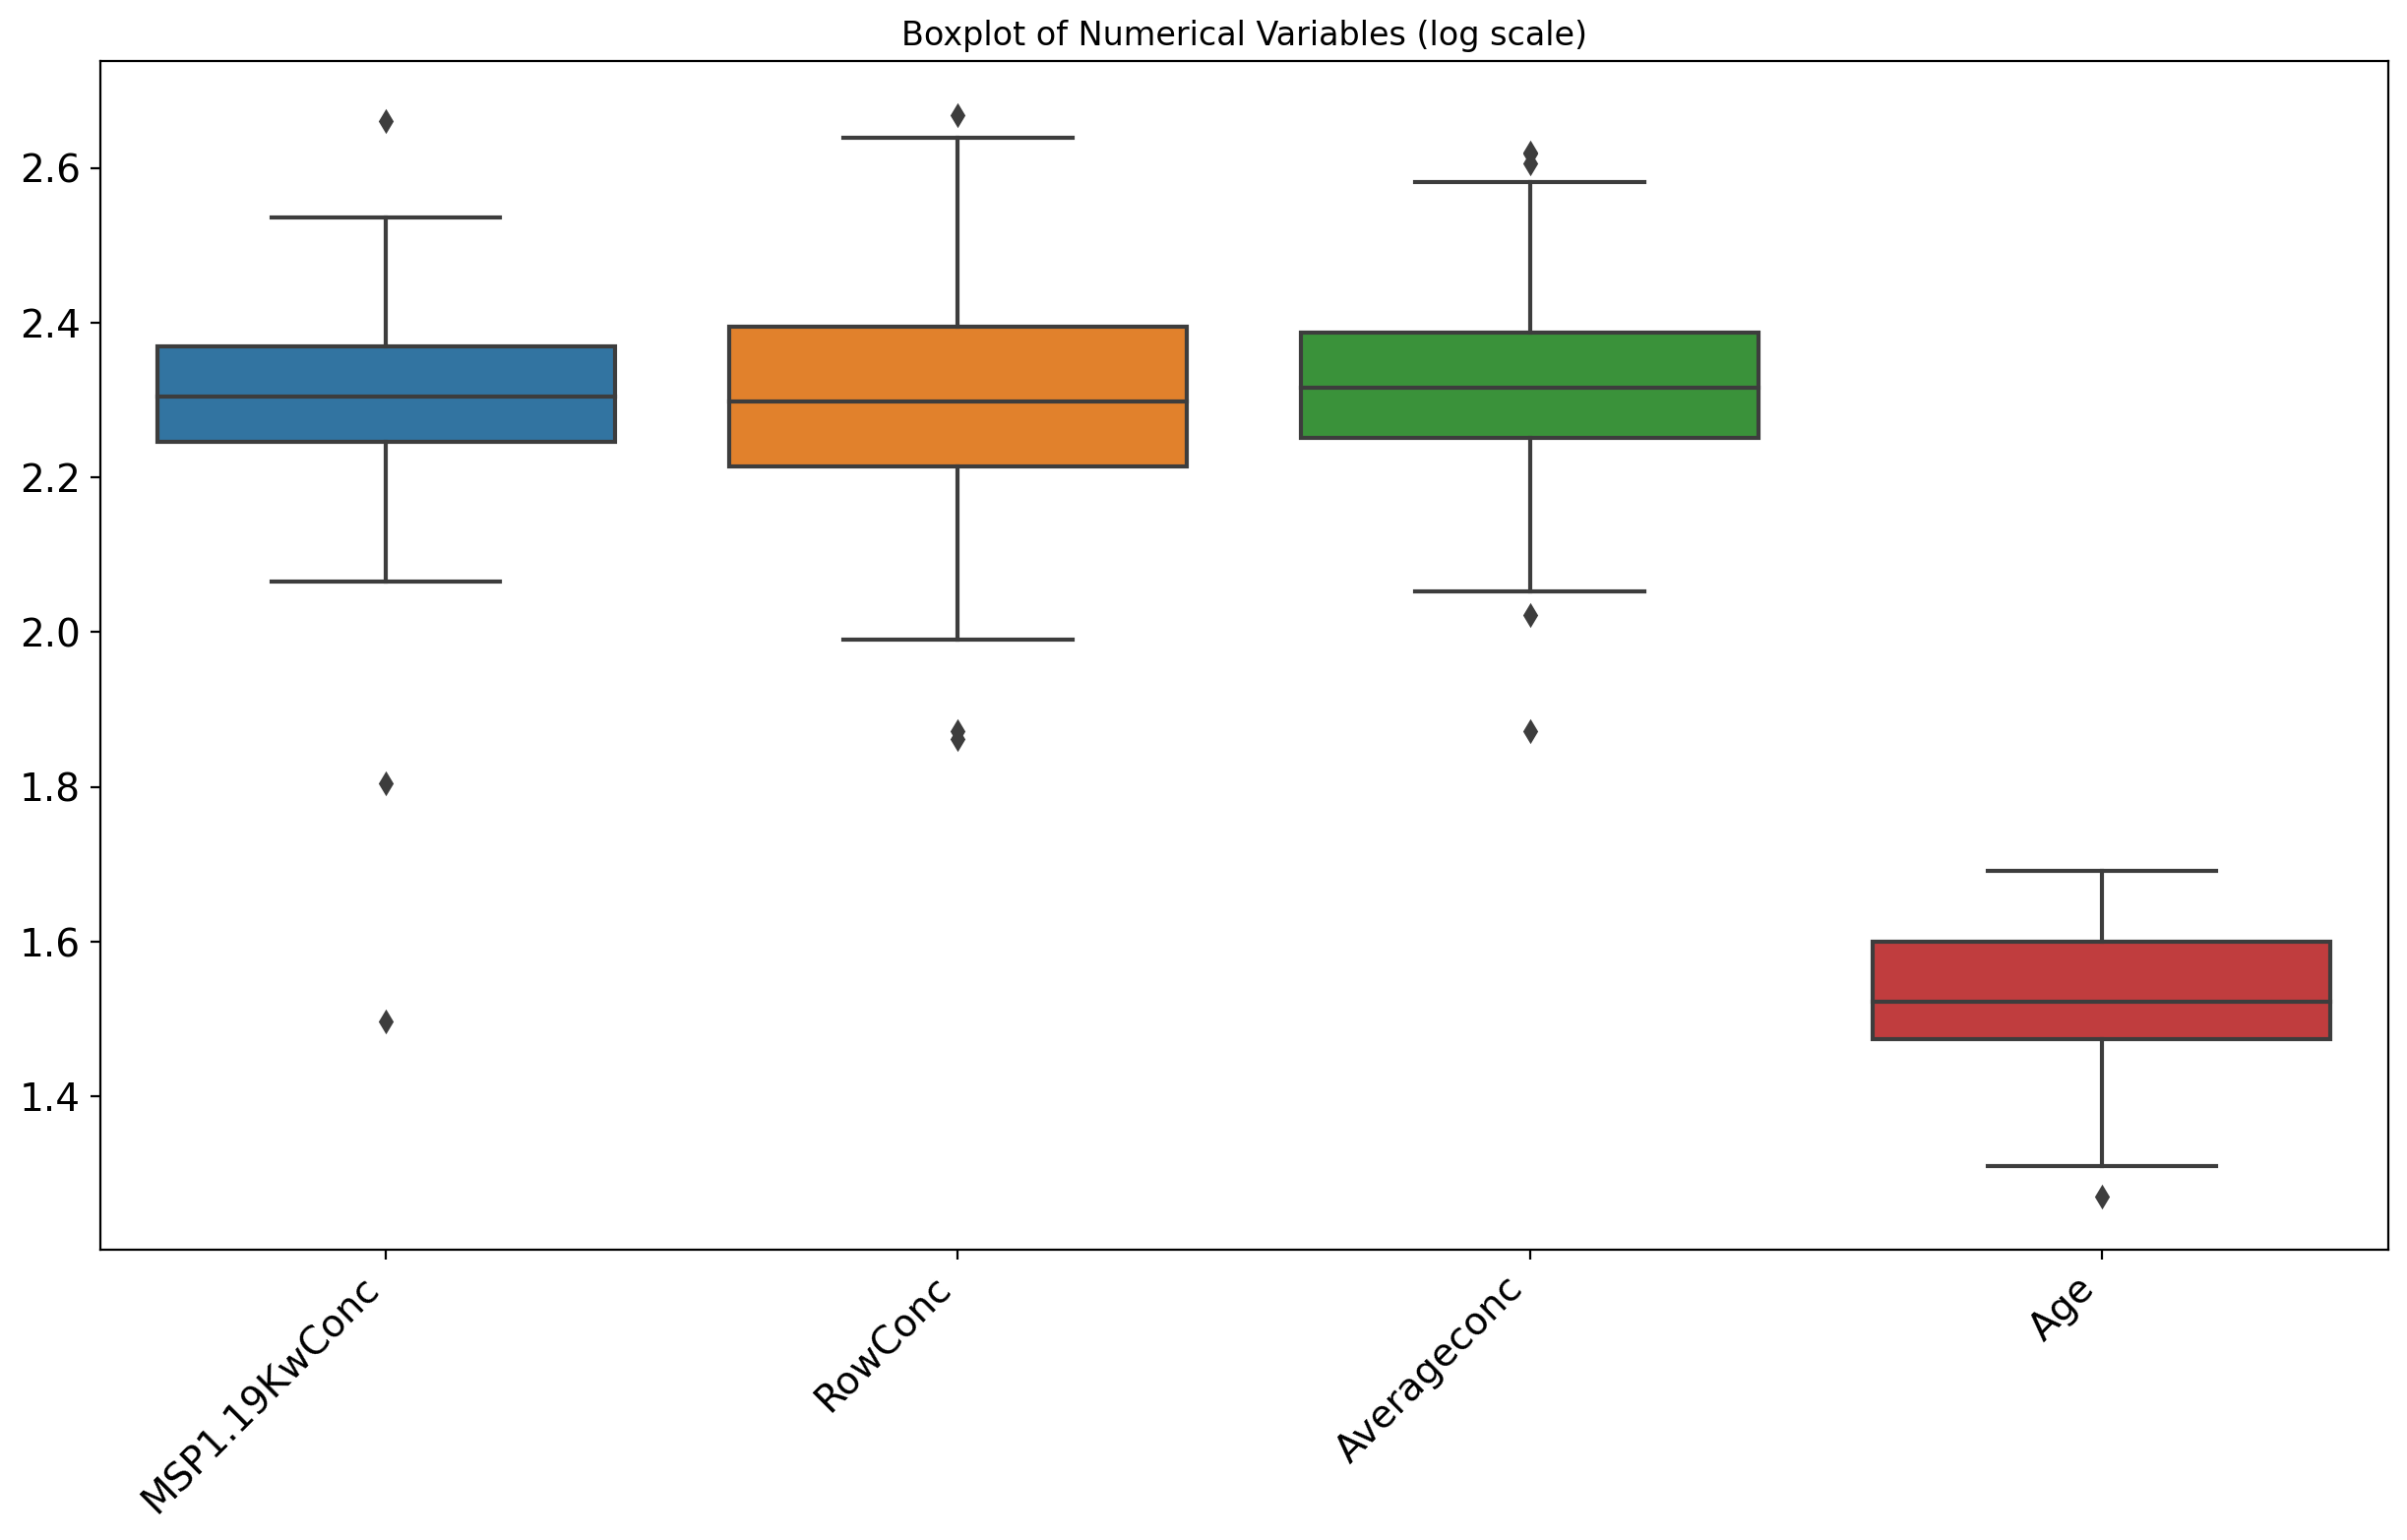

In [47]:
plt.figure(figsize=(15, 8), dpi=200)
sns.boxplot(data=dflog)
plt.title('Boxplot of Numerical Variables (log scale)')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=None, ha='right', fontsize=14)
plt.show()

**Count Plots:**
   Explore the count of categorical variables.

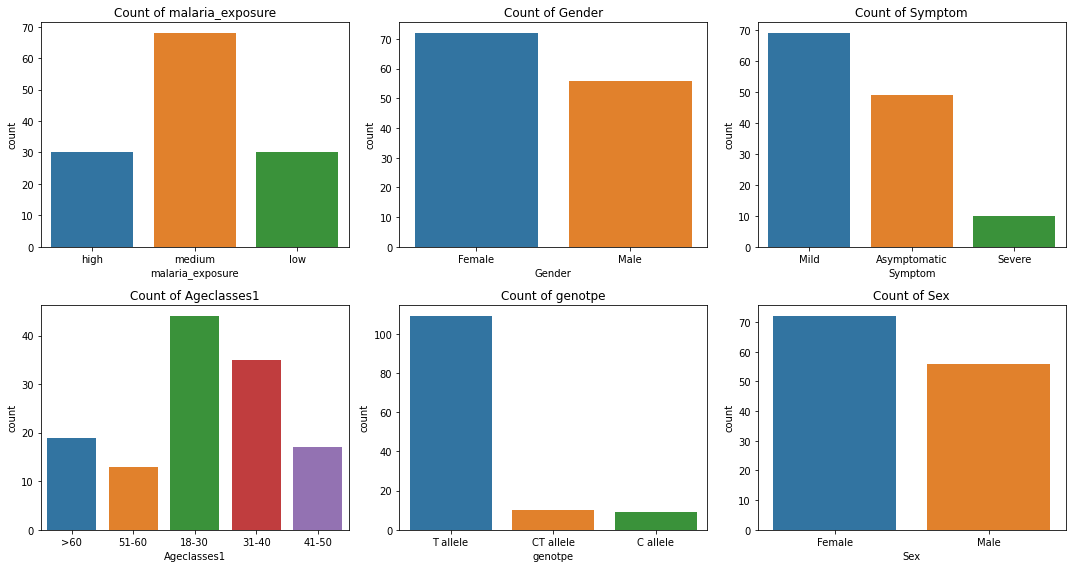

In [48]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(df_.select_dtypes(exclude='number').columns):
   plt.subplot(2, 3, i + 1)
   sns.countplot(data=df_, x=col)
   plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

* Using piechart

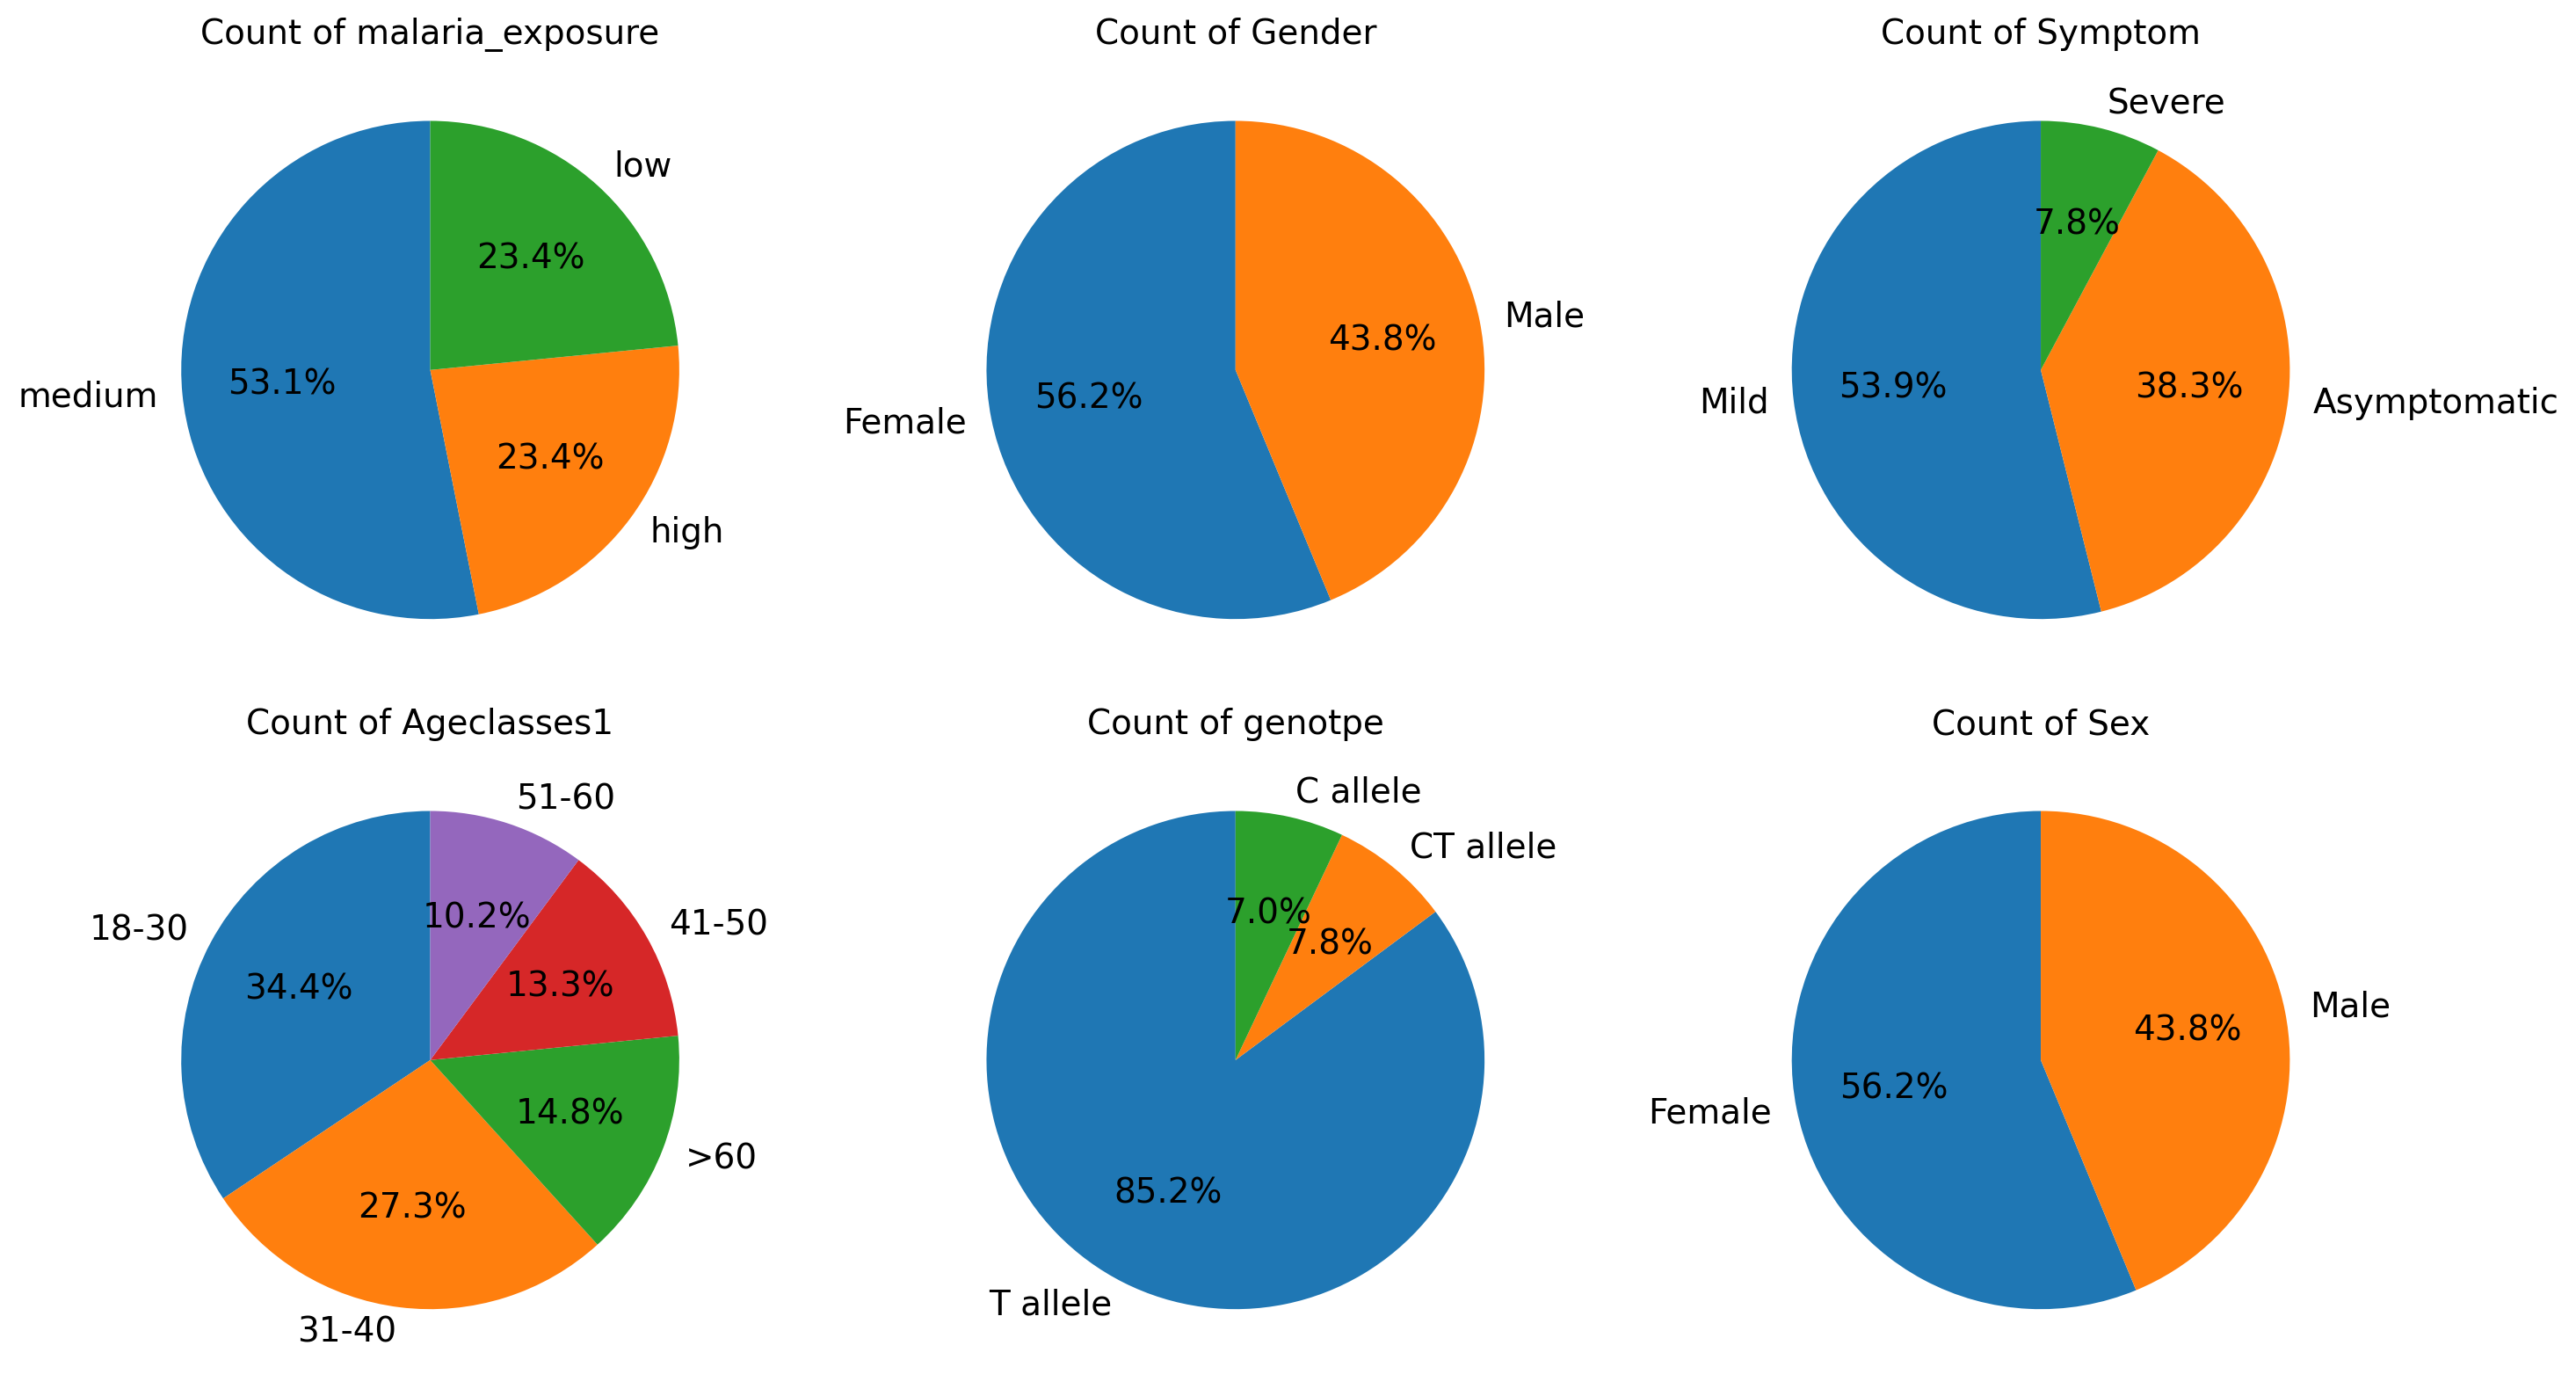

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8), dpi=200)

# Define the number of rows and columns in the subplot grid
rows = 2
cols = 3

for i, col in enumerate(df_.select_dtypes(exclude='number').columns):
    plt.subplot(rows, cols, i + 1)

    # Calculate counts and labels for the pie chart
    counts = df_[col].value_counts()
    labels = counts.index

    # Plot pie chart
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})

    plt.title(f'Count of {col}', fontsize=14)

plt.tight_layout()
plt.show()


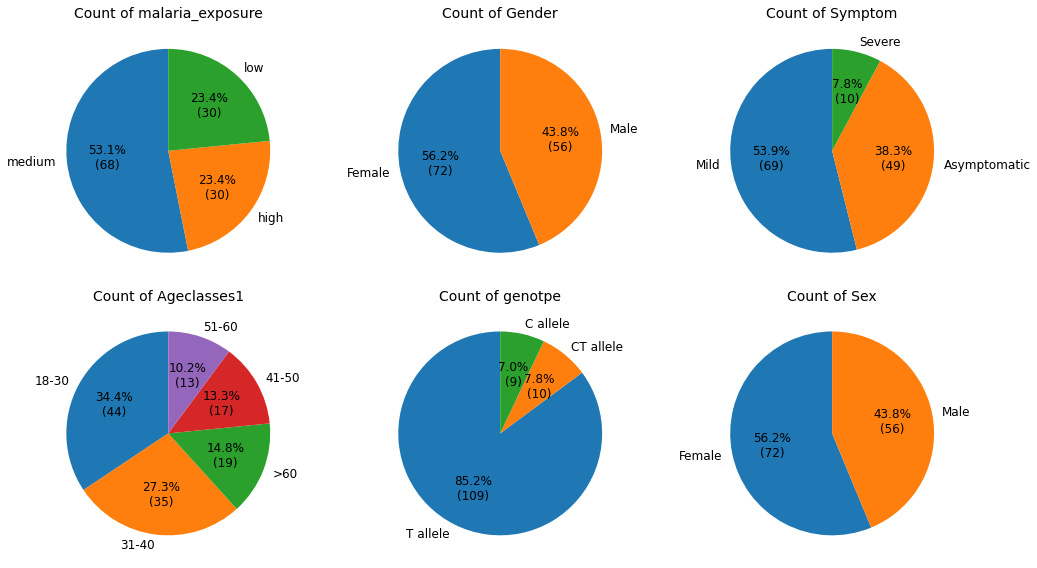

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

# Define the number of rows and columns in the subplot grid
rows = 2
cols = 3

for i, col in enumerate(df_.select_dtypes(exclude='number').columns):
    plt.subplot(rows, cols, i + 1)

    # Calculate counts and labels for the pie chart
    counts = df_[col].value_counts()
    labels = counts.index

    # Plot pie chart with percentages and physical count
    plt.pie(counts,
            labels=labels,
            autopct=lambda p: f'{p:.1f}%\n({int(p * sum(counts) / 100)})',
            startangle=90, textprops={'fontsize': 12})

    plt.title(f'Count of {col}', fontsize=14)

plt.tight_layout()
plt.show()


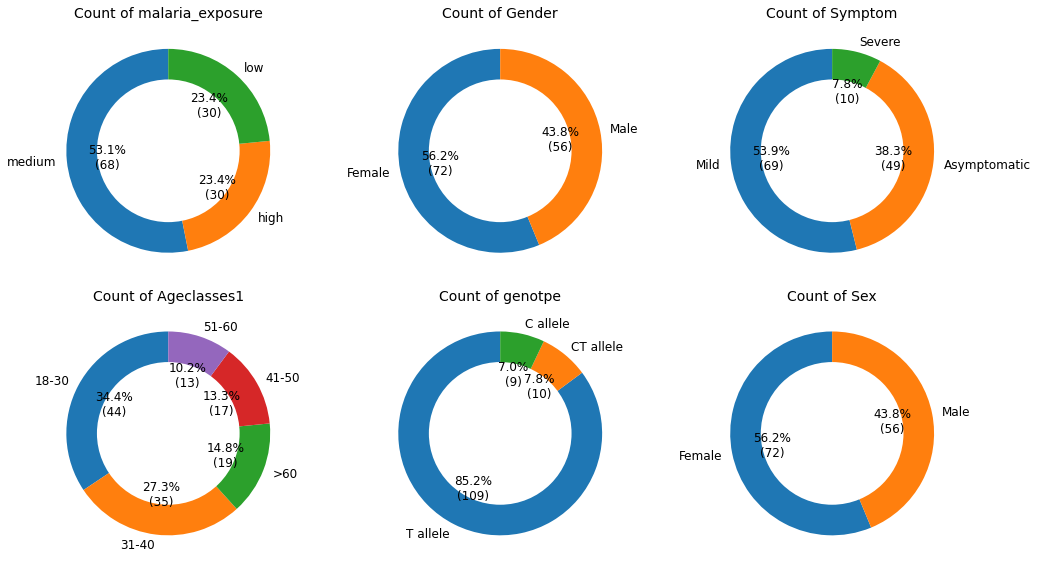

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

# Define the number of rows and columns in the subplot grid
rows = 2
cols = 3

for i, col in enumerate(df_.select_dtypes(exclude='number').columns):
    plt.subplot(rows, cols, i + 1)

    # Calculate counts and labels for the pie chart
    counts = df_[col].value_counts()
    labels = counts.index

    # Plot pie chart with percentages and physical count
    plt.pie(counts, labels=labels, 
            autopct=lambda p: f'{p:.1f}%\n({int(p * sum(counts) / 100)})', startangle=90, textprops={'fontsize': 12})

    # Draw a white circle at the center to create a donut hole
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title(f'Count of {col}', fontsize=14)

plt.tight_layout()
plt.show()


* **create separate boxplots for numerical variables** 

In [52]:
categorical_columns

Index(['malaria_exposure', 'Gender', 'Symptom', 'Ageclasses1', 'genotpe',
       'Sex'],
      dtype='object')

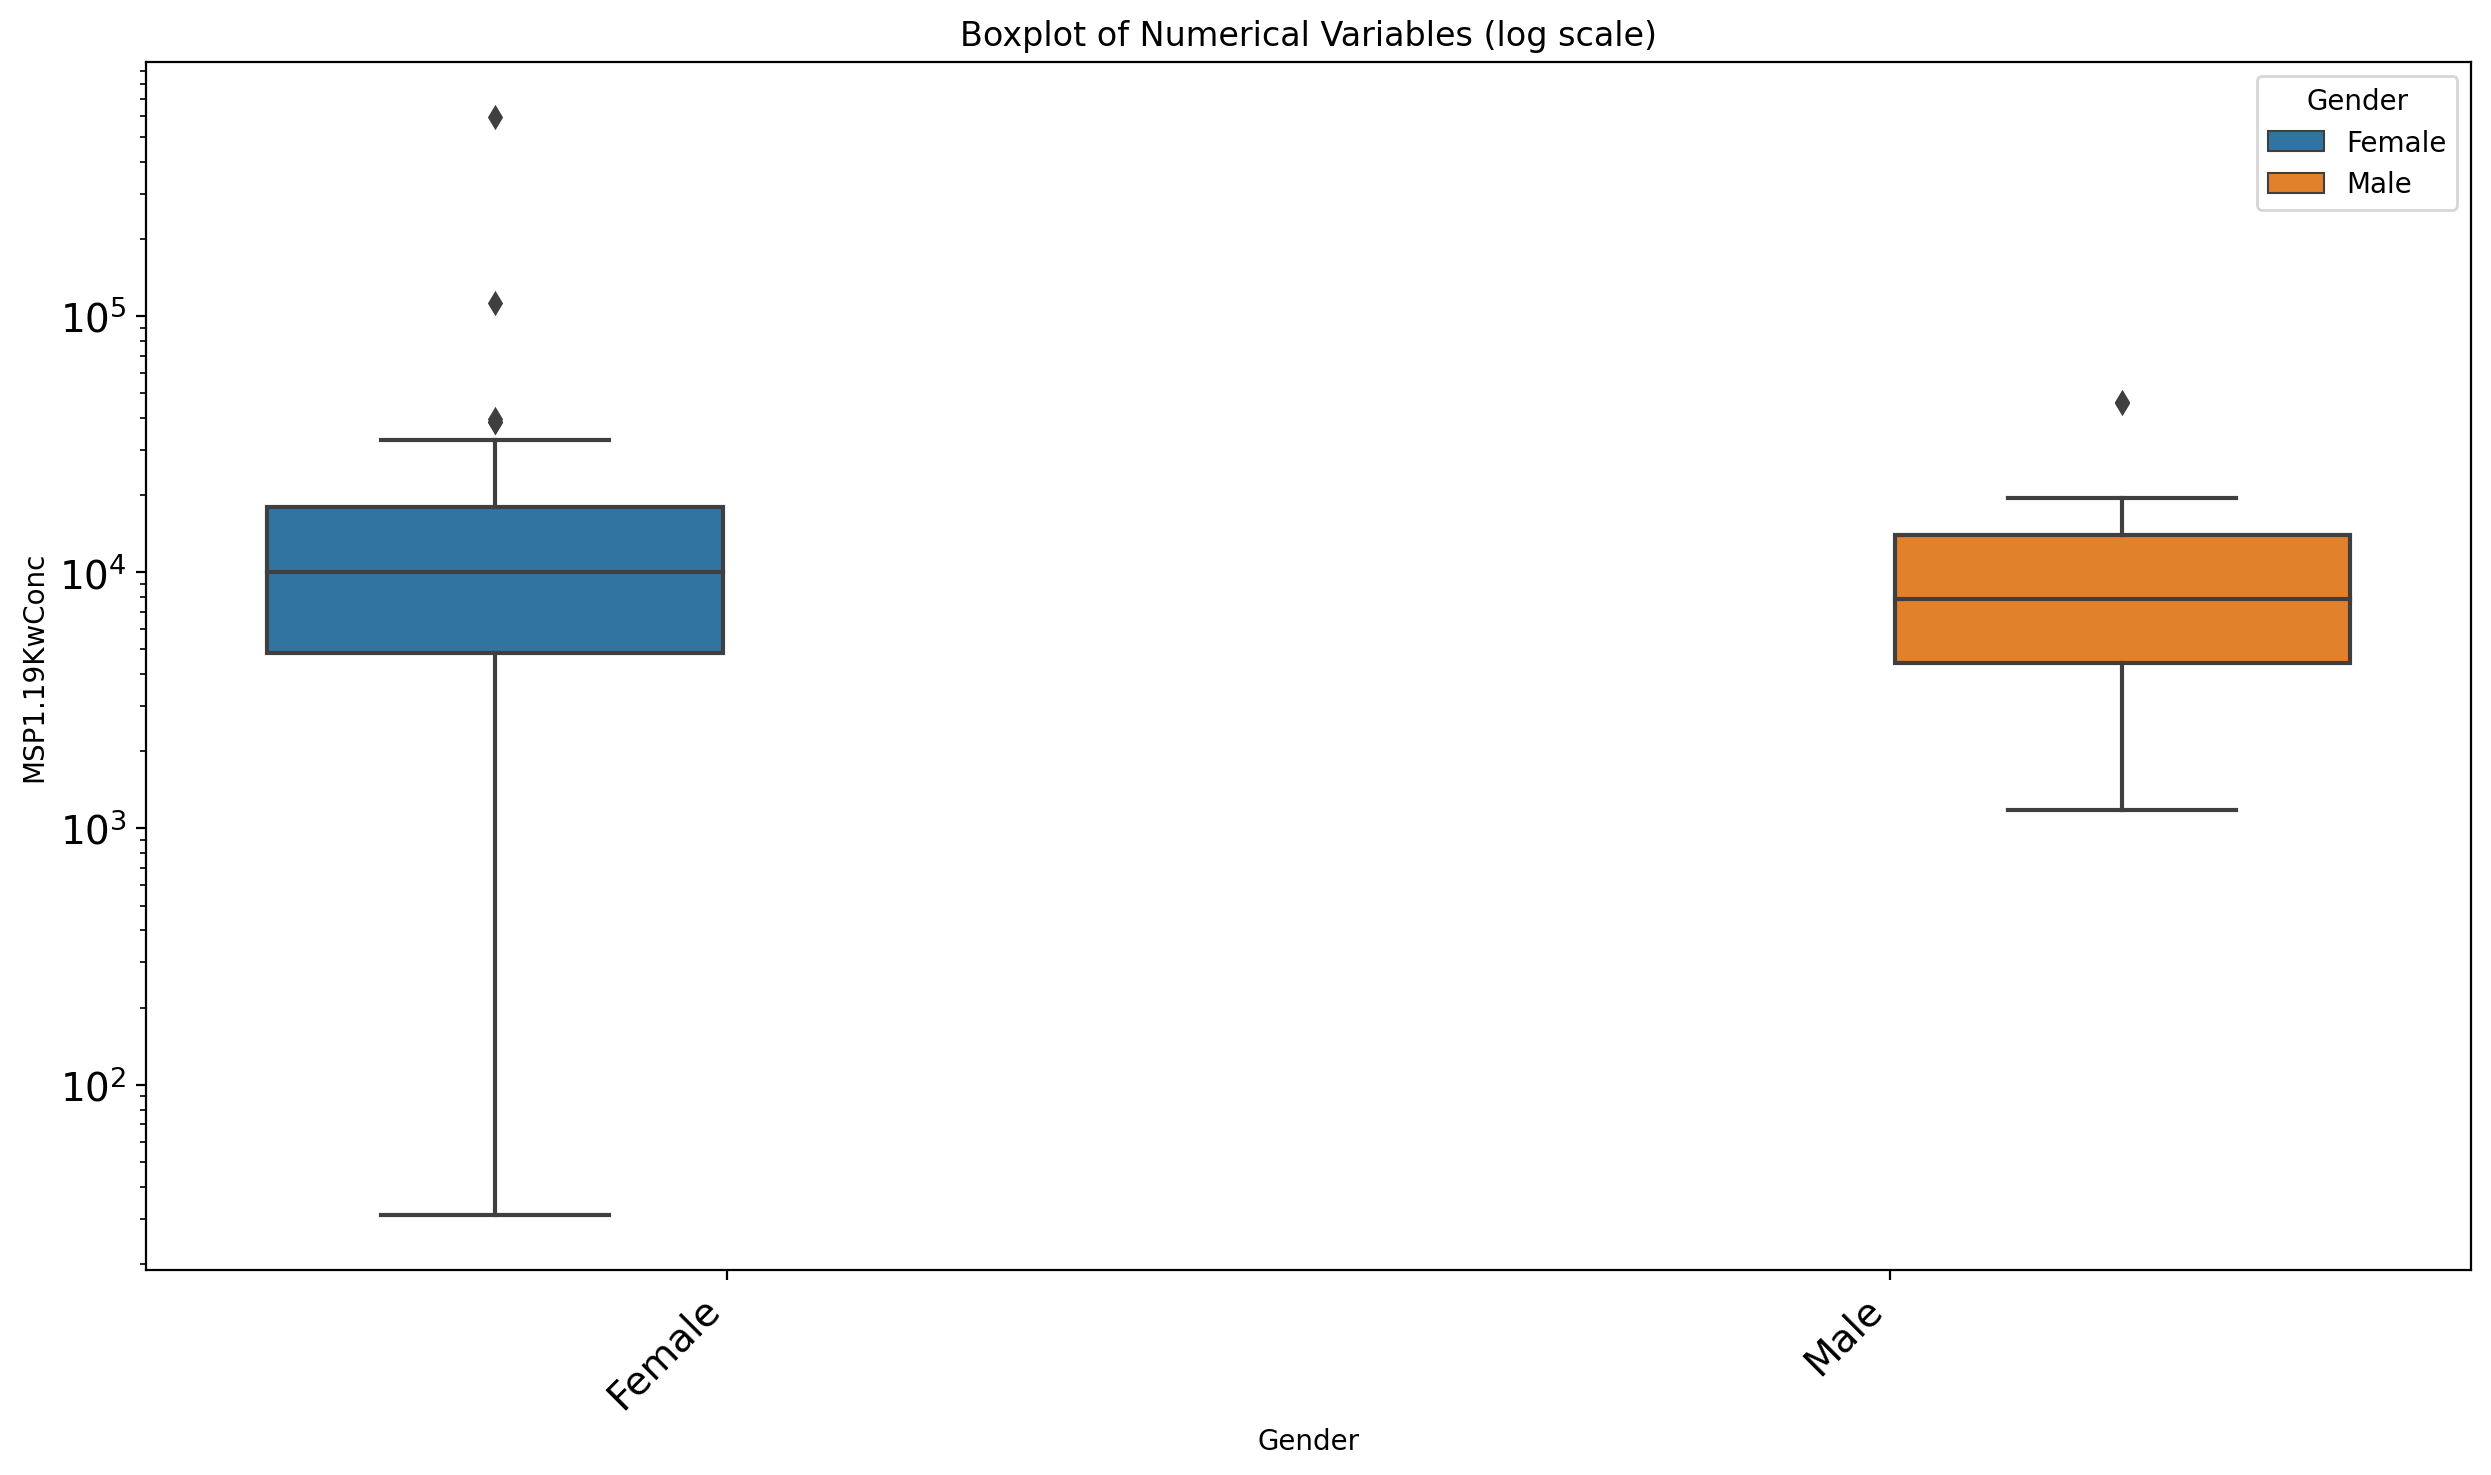

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8), dpi=200)



# Assuming 'gender' is a column in your DataFrame
sns.boxplot(x='Gender', y=numeric_columns[0], data=df_, hue='Gender')
plt.yscale('log')  # Set y-axis to log scale

plt.title('Boxplot of Numerical Variables (log scale)')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=None, ha='right', fontsize=14)
plt.show()


In [54]:
df_[categorical_columns]

,malaria_exposure,Gender,Symptom,Ageclasses1,genotpe,Sex
0,high,Female,Mild,>60,T allele,Female
1,medium,Female,Mild,51-60,T allele,Female
2,medium,Female,Mild,18-30,T allele,Female
3,medium,Female,Mild,31-40,T allele,Female
4,low,Female,Mild,18-30,T allele,Female
...,...,...,...,...,...,...
123,medium,Male,Asymptomatic,31-40,C allele,Male
124,medium,Male,Asymptomatic,18-30,T allele,Male
125,medium,Male,Asymptomatic,18-30,T allele,Male
126,medium,Male,Asymptomatic,51-60,C allele,Male


In [55]:
# Concatenate numeric_columns and cat_columns along columns (axis=1)
merged_df = pd.concat([dflog, df_[categorical_columns]], axis=1)


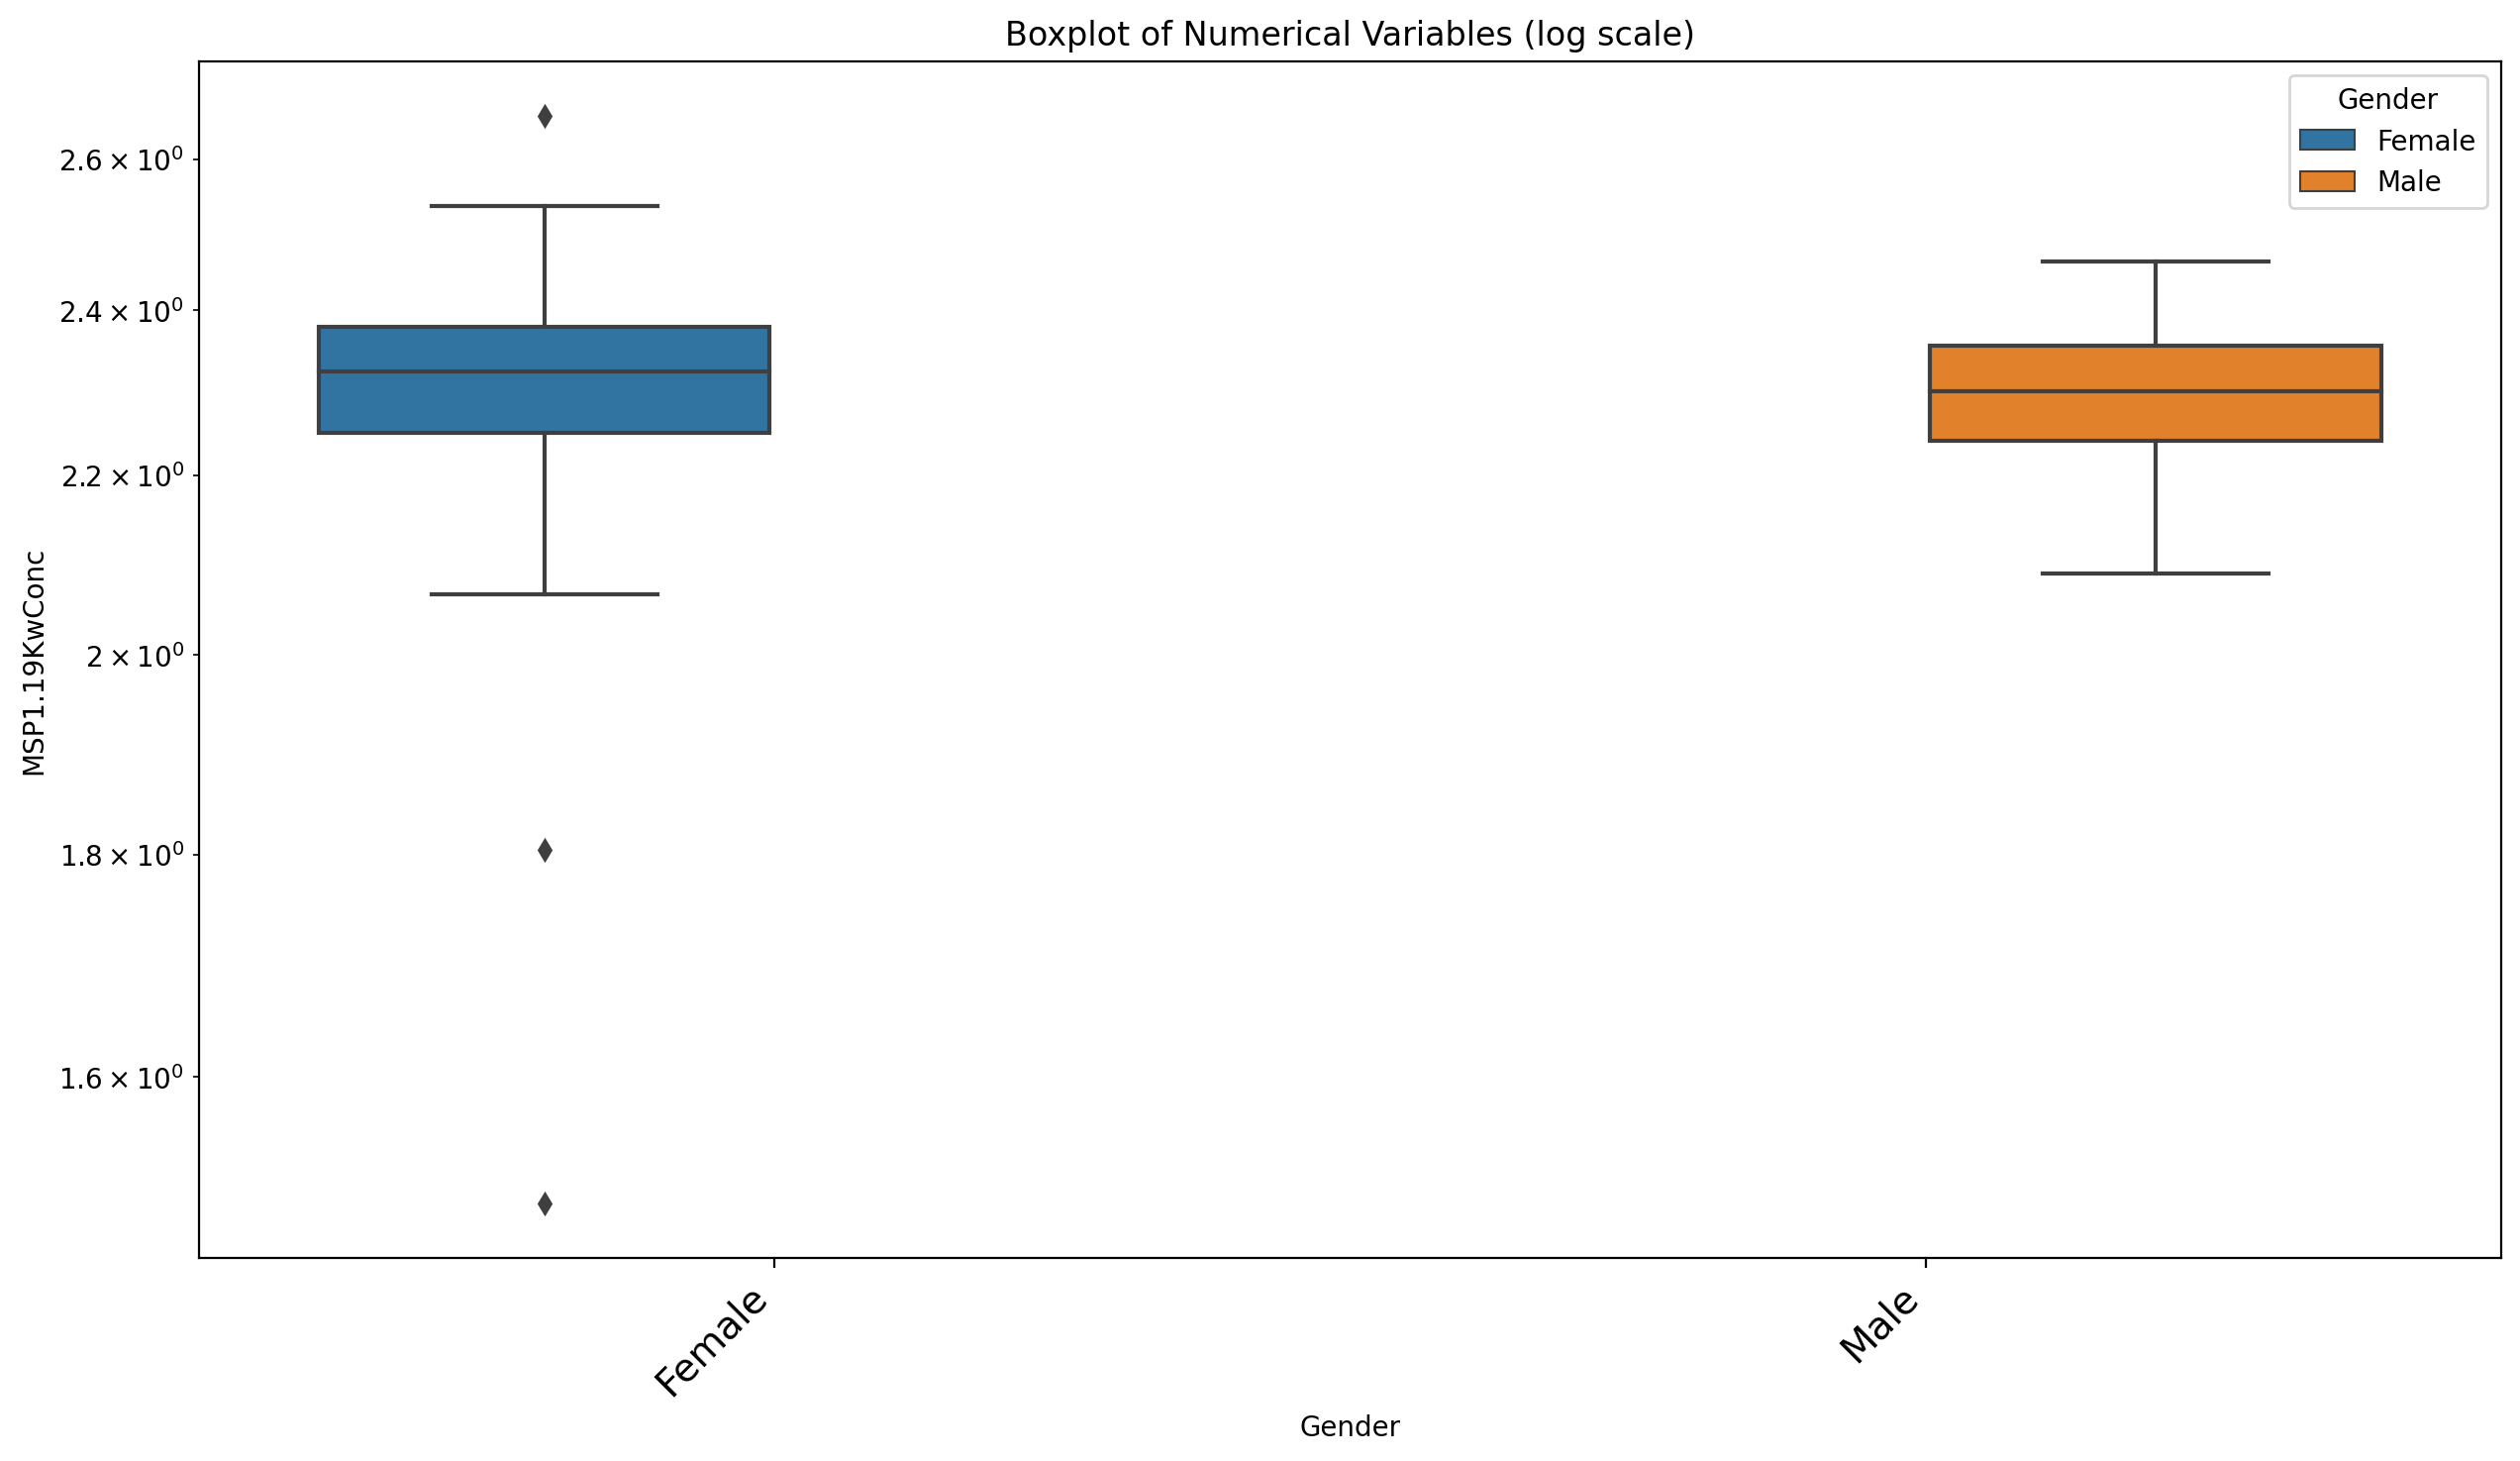

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8), dpi=200)



# Assuming 'gender' is a column in your DataFrame
sns.boxplot(x='Gender', y=numeric_columns[0], data=merged_df, hue='Gender')
plt.yscale('log')  # Set y-axis to log scale

plt.title('Boxplot of Numerical Variables (log scale)')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=None, ha='right', fontsize=14)
plt.show()


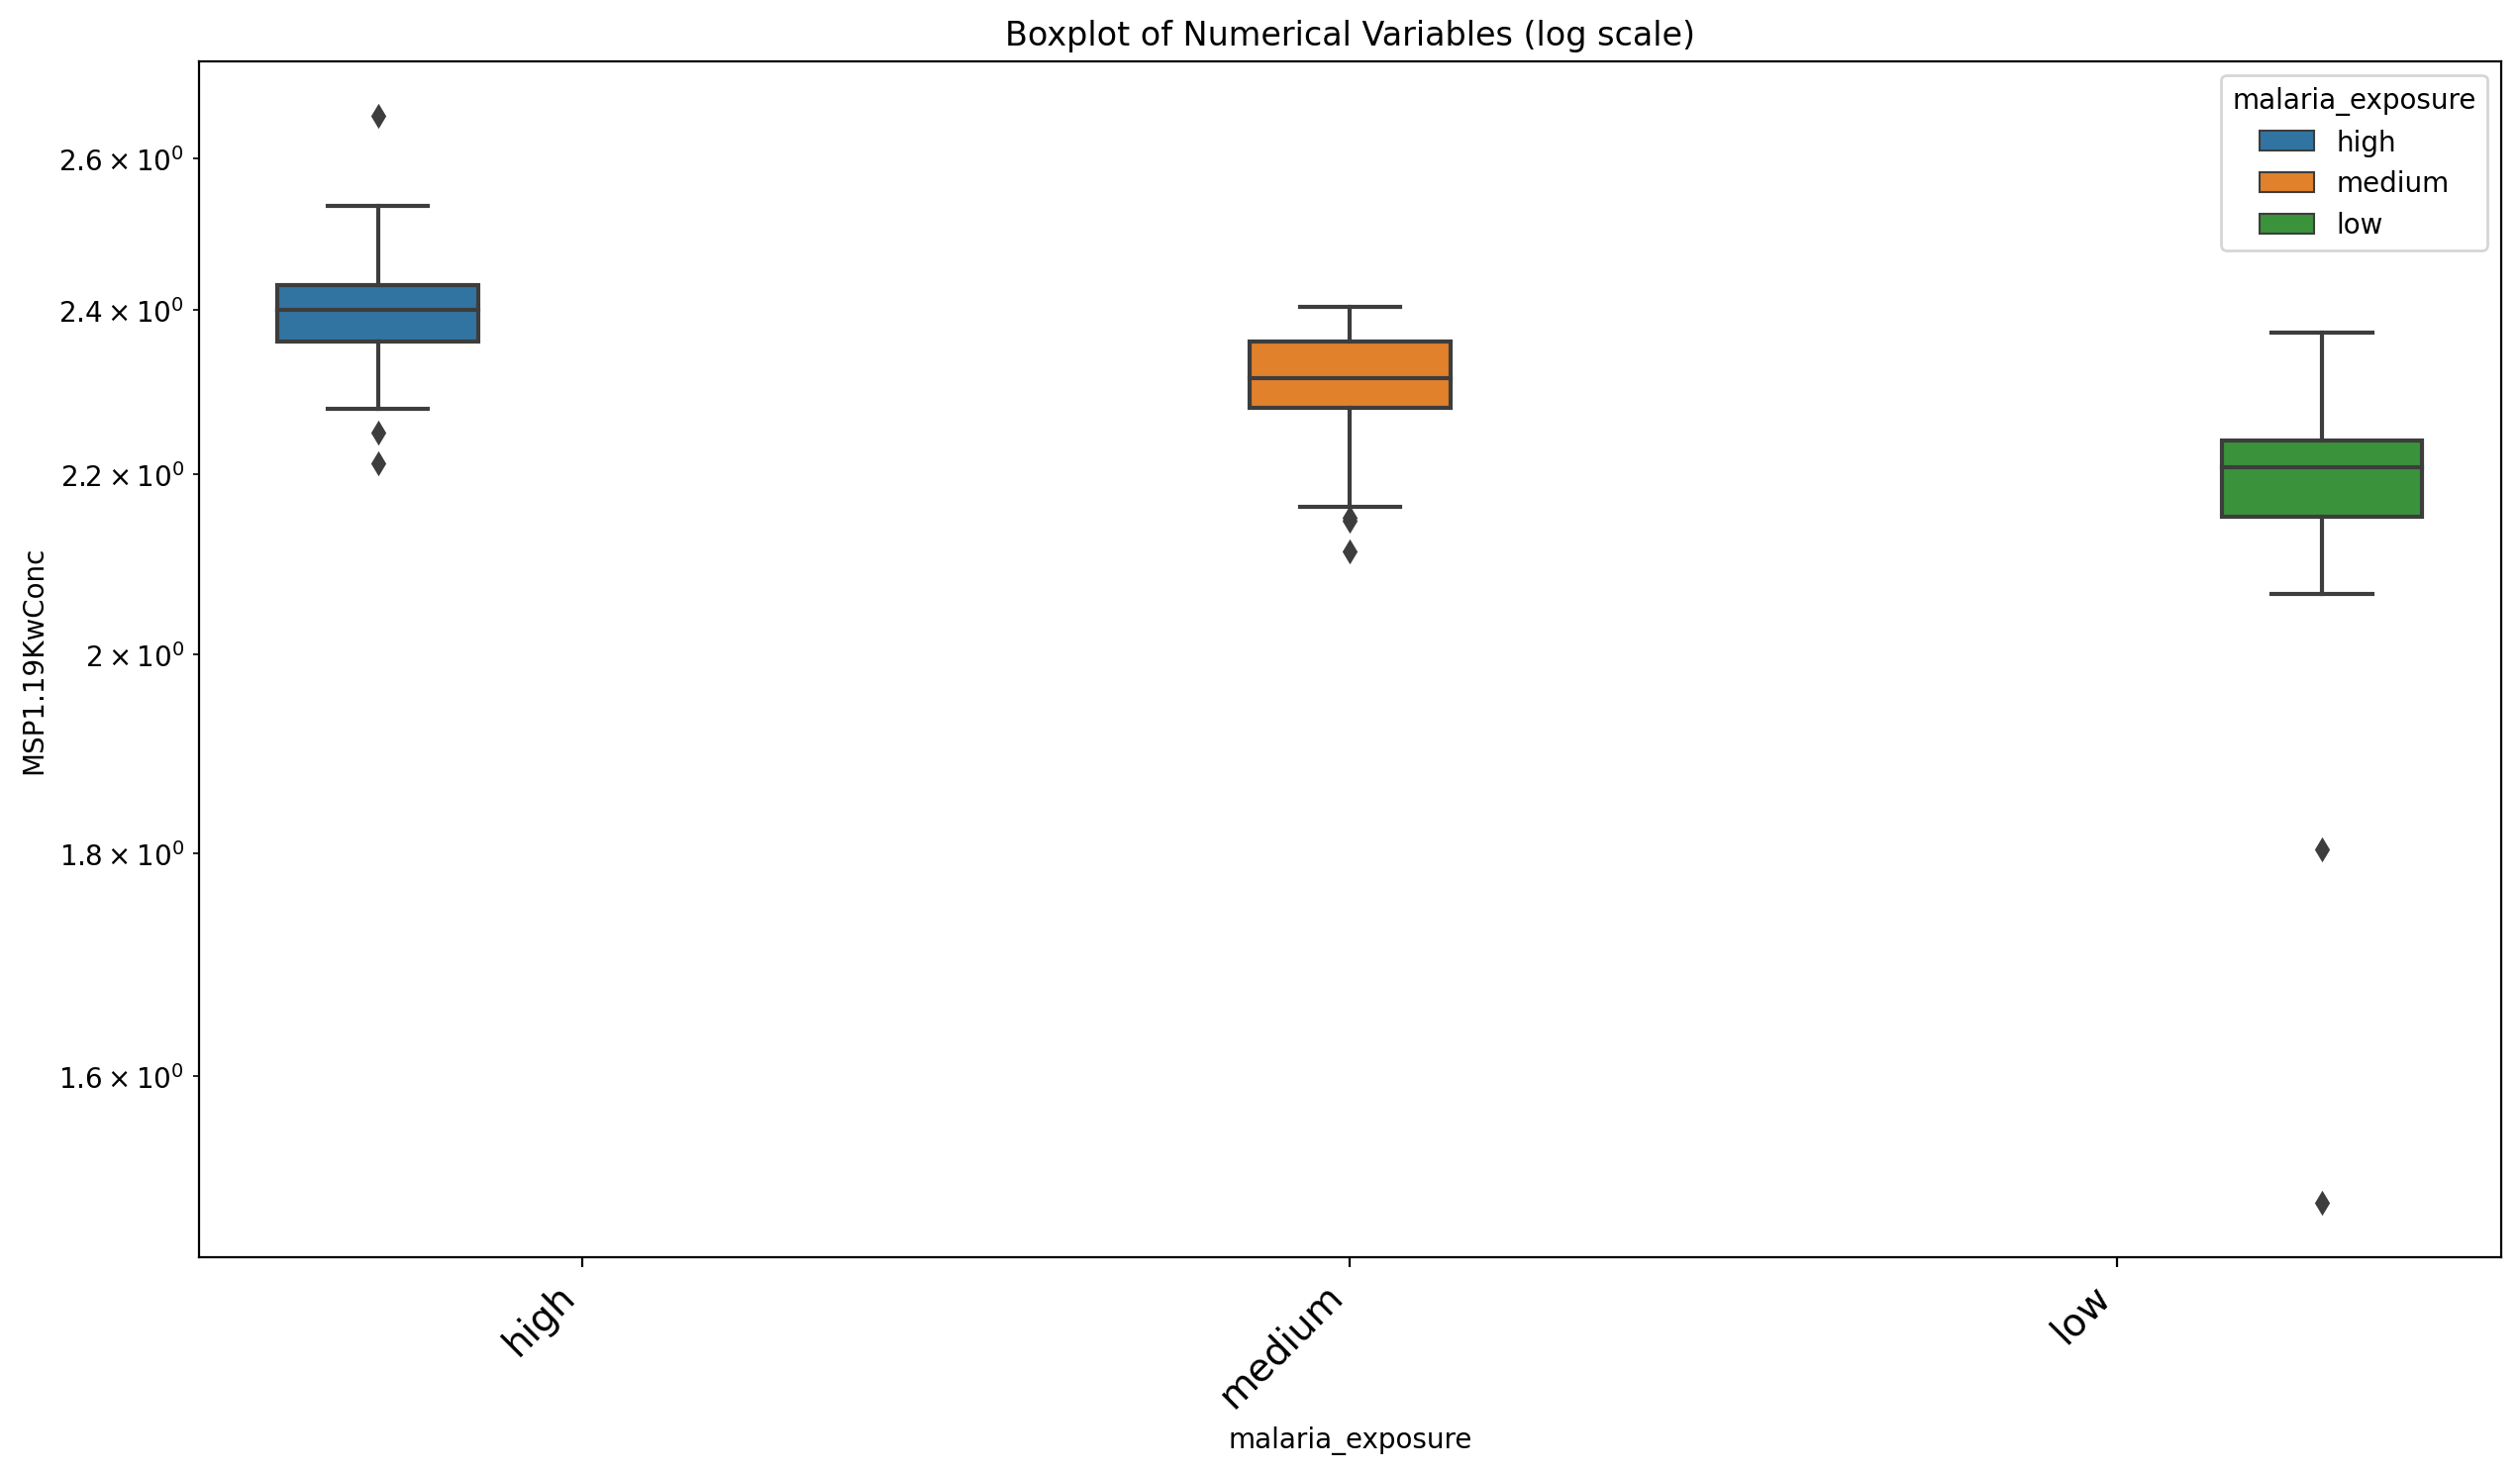

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8), dpi=200)



# Assuming 'gender' is a column in your DataFrame
sns.boxplot(x='malaria_exposure', y=numeric_columns[0], data=merged_df, hue='malaria_exposure')
plt.yscale('log')  # Set y-axis to log scale

plt.title('Boxplot of Numerical Variables (log scale)')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=None, ha='right', fontsize=14)
plt.show()

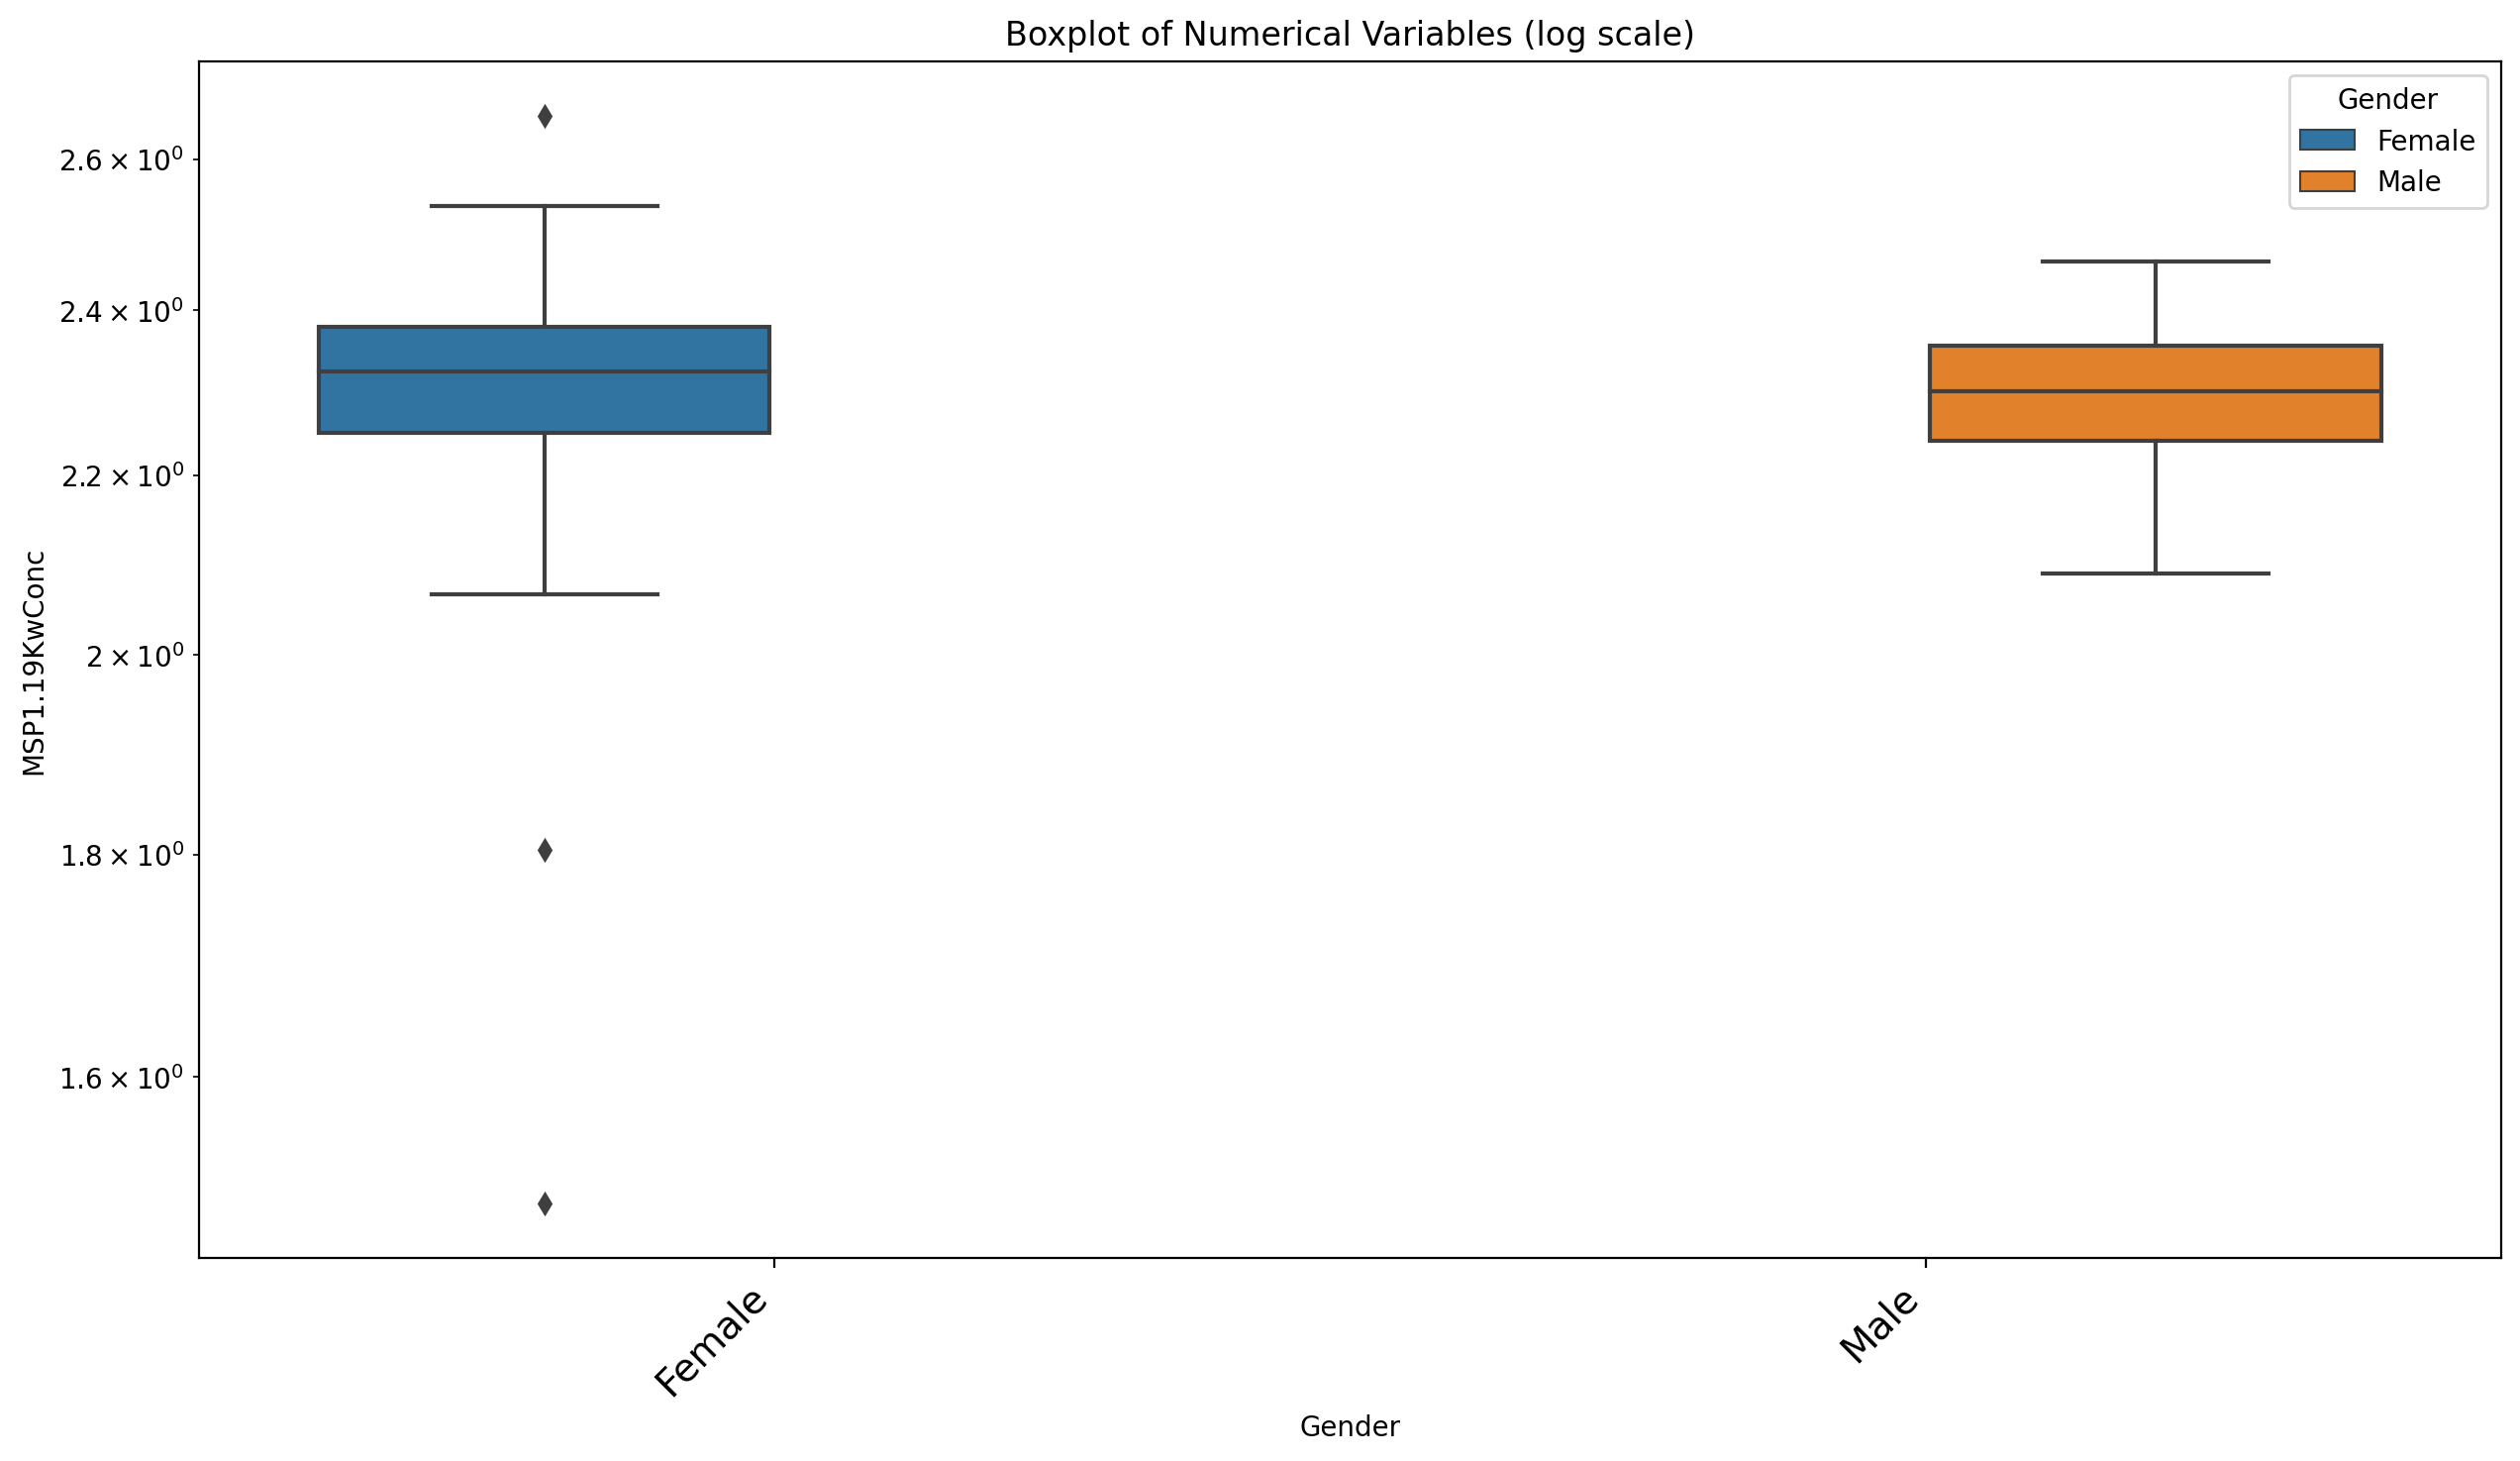

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8), dpi=200)



# Assuming 'gender' is a column in your DataFrame
sns.boxplot(x='Gender', y=numeric_columns[0], data=merged_df, hue='Gender')
plt.yscale('log')  # Set y-axis to log scale

plt.title('Boxplot of Numerical Variables (log scale)')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=None, ha='right', fontsize=14)
plt.show()